# Introdu√ß√£o e Contextualiza√ß√£o


## Objetivo

O canal **Gastronomades** √© um canal pessoal, √© dedicado a compartilhar experi√™ncias de viagens, roteiros gastron√¥micos e dicas culturais, buscando engajar uma comunidade apaixonada por explorar novos lugares e sabores.
<br><br><br>

A an√°lise detalhada do desempenho hist√≥rico dos v√≠deos √© fundamental para entender o que gera mais valor para o p√∫blico e para o pr√≥prio crescimento do canal. Ao identificar padr√µes de sucesso ‚Äî como tipos de v√≠deos que atraem mais visualiza√ß√µes, inscritos, receita e engajamento ‚Äî √© poss√≠vel otimizar estrat√©gias de conte√∫do, melhorar a performance de v√≠deos futuros e, assim, potencializar a reten√ß√£o e a expans√£o da audi√™ncia.
<br><br><br>

Trata-se de um problema de aprendizado n√£o supervisionado, uma vez que n√£o temos nenhuma informa√ß√£o quanto √† classifica√ß√£o pr√©via dos v√≠deos e √© de interesse conseguir categorizar os v√≠deos entre bons, medianos e ruins de acordo com as estat√≠sticas.

## Conjunto de dados


O dataset utilizado neste MVP cont√©m m√©tricas hist√≥ricas de **v√≠deos longos**, acumuladas desde a cria√ß√£o do canal at√© o momento atual. Cada linha do dataset representa um v√≠deo, trazendo informa√ß√µes como data de publica√ß√£o, dura√ß√£o, visualiza√ß√µes, inscritos ganhos, etc.    
<br><br>
Optou-se por **excluir os v√≠deos do formato *Shorts***, pois possuem din√¢mica e m√©tricas espec√≠ficas que diferem dos v√≠deos longos ‚Äî o que poderia distorcer a an√°lise comparativa. Assim, o foco recai sobre o conte√∫do de maior dura√ß√£o, que costuma gerar maior reten√ß√£o e receita por visualiza√ß√£o, permitindo investigar quais caracter√≠sticas mais contribuem para o sucesso do canal no longo prazo.
<br><br>

Descri√ß√£o dos atributos do conjunto de dados:

- **Hor√°rio de publica√ß√£o do v√≠deo:** data/hora de publica√ß√£o
- **Dura√ß√£o:** dura√ß√£o total do v√≠deo em segundos/minutos
- **Tempo de exibi√ß√£o (horas):** tempo tempo total de horas de visualiza√ß√£o
- **Inscritos:** n√∫mero total de inscritos do canal
- **Inscri√ß√µes obtidas:** quantos inscritos foram ganhos pelo v√≠deo
- **Inscri√ß√µes perdidas:** quantos inscritos foram perdidos ap√≥s assistir o v√≠deo
- **Marca√ß√µes "Gostei"/"N√£o gostei":** intera√ß√µes de likes e dislikes
- **"Gostei" (vs. "N√£o gostei") (%):** propor√ß√£o
- **Compartilhamentos:** total de vezes que o v√≠deo foi compartilhado
- **Coment√°rios adicionados:** total de coment√°rios feitos no v√≠deo
- **Receita estimada (USD):** receita gerada
- **RPM (USD):** receita por mil impress√µes
- **Visualiza√ß√µes:** total de views do v√≠deo
- **Impress√µes:** total de impress√µes
- **Taxa de cliques de impress√µes (%):** CTR
- **Dura√ß√£o m√©dia da visualiza√ß√£o:** tempo m√©dio assistido

## Hip√≥teses


S√£o hip√≥teses do problema:

- V√≠deos com mais views tendem a trazer mais inscritos e receita.
- V√≠deos mais longos podem ter maior dura√ß√£o m√©dia de visualiza√ß√£o.
- Alta CTR pode indicar t√≠tulo/capa mais atrativos.
- Compartilhamentos e coment√°rios podem indicar engajamento mais profundo.

## Bibliotecas


In [99]:
import pandas as pd
from datetime import datetime #converte uma coluna em formato datetime
import matplotlib.pyplot as plt
import seaborn as sns


## Input dos dados


In [100]:
# Carga dos dados

#Analytics


#raw
url_1 = "https://raw.githubusercontent.com/nathaliaverissimo/PUC-RIO/742513f1078a782654d3729a376c70d2b2062f81/gastronomades_analytics__jun2025.xlsx"
raw__gastronomades_jun2025 = pd.read_excel(url_1,sheet_name="Dados da tabela")
raw__gastronomades_jun2025.head(3)

#upload

#raw__gastronomades_jun2025 = pd.read_excel('gastronomades_analytics__jun2025.xlsx', engine='openpyxl')
#raw__gastronomades_jun2025.head(3)

Conte√∫do                                    T√≠tulo do v√≠deo  \
0  ZCFX5pQDs50  O melhor da GASTRONOMIA CURITIBANA | Onde COME...   
1  R5zvHCL4uv4  Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...   
2  xKyysw_ic0c      ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS   

  Hor√°rio de publica√ß√£o do v√≠deo  Dura√ß√£o  Tempo de exibi√ß√£o (horas)  \
0                   Oct 13, 2024     2120                  5343.0193   
1                   Jan 12, 2025     2042                  2128.7062   
2                    Nov 5, 2022     1455                  1495.6786   

   Inscritos  Inscri√ß√µes obtidas  Inscri√ß√µes perdidas  Marca√ß√µes "Gostei"  \
0        363                 370                    7                 796   
1         70                  73                    3                 275   
2        103                 107                    4                 333   

   Marca√ß√µes "N√£o gostei"  "Gostei" (vs. "N√£o gostei") (%)  Compartilhamentos  \
0                      25                            96.95                255   
1                       6                            97.86                 83   
2                      12                            96.52                 90   

   Coment√°rios adicionados  Receita estimada (USD)  RPM (USD)  Visualiza√ß√µes  \
0                       15                  52.735      1.658          31933   
1                       15                  20.755      1.864          11215   
2                       10                   0.797      0.049          16300   

   Impress√µes  Taxa de cliques de impress√µes (%) Dura√ß√£o m√©dia da visualiza√ß√£o  
0      515258                               3.92                       0:10:02  
1      132731                               5.69                       0:11:23  
2      253246                               4.42                       0:05:30

In [101]:
# Carga dos dados

#Playlists

#raw
url_2 = "https://raw.githubusercontent.com/nathaliaverissimo/PUC-RIO/742513f1078a782654d3729a376c70d2b2062f81/gastronomades_playlists.xlsx"
raw__gastronomades_playlists = pd.read_excel(url_2,sheet_name="Planilha1")
raw__gastronomades_playlists.head(3)



#upload
#raw__gastronomades_playlists = pd.read_excel('gastronomades_playlists.xlsx', engine='openpyxl')
#raw__gastronomades_playlists.head(3)



#Merge para adicionar a coluna de Playlist no dataset original
raw__gastronomades_jun2025 = raw__gastronomades_jun2025.merge(raw__gastronomades_playlists, left_on = 'Conte√∫do', right_on = 'Conte√∫do', how='left')
raw__gastronomades_jun2025.head(3)

Conte√∫do                                  T√≠tulo do v√≠deo_x  \
0  ZCFX5pQDs50  O melhor da GASTRONOMIA CURITIBANA | Onde COME...   
1  R5zvHCL4uv4  Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...   
2  xKyysw_ic0c      ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS   

  Hor√°rio de publica√ß√£o do v√≠deo  Dura√ß√£o  Tempo de exibi√ß√£o (horas)  \
0                   Oct 13, 2024     2120                  5343.0193   
1                   Jan 12, 2025     2042                  2128.7062   
2                    Nov 5, 2022     1455                  1495.6786   

   Inscritos  Inscri√ß√µes obtidas  Inscri√ß√µes perdidas  Marca√ß√µes "Gostei"  \
0        363                 370                    7                 796   
1         70                  73                    3                 275   
2        103                 107                    4                 333   

   Marca√ß√µes "N√£o gostei"  ...  Compartilhamentos  Coment√°rios adicionados  \
0                      25  ...                255                       15   
1                       6  ...                 83                       15   
2                      12  ...                 90                       10   

   Receita estimada (USD)  RPM (USD)  Visualiza√ß√µes  Impress√µes  \
0                  52.735      1.658          31933      515258   
1                  20.755      1.864          11215      132731   
2                   0.797      0.049          16300      253246   

   Taxa de cliques de impress√µes (%)  Dura√ß√£o m√©dia da visualiza√ß√£o  \
0                               3.92                        0:10:02   
1                               5.69                        0:11:23   
2                               4.42                        0:05:30   

                                   T√≠tulo do v√≠deo_y        Playlist  
0  O melhor da GASTRONOMIA CURITIBANA | Onde COME...          Paran√°  
1  Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...         Alagoas  
2      ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS  Rio de Janeiro  

[3 rows x 21 columns]

# Pr√©-processamento de dados


## Overview

In [102]:
# dimens√£o do dataset (linhas,colunas)

raw__gastronomades_jun2025.shape

(84, 21)

In [103]:
# estat√≠sticas gerais do dataset
raw__gastronomades_jun2025.describe()

Dura√ß√£o  Tempo de exibi√ß√£o (horas)  Inscritos  Inscri√ß√µes obtidas  \
count    84.000000                  84.000000   84.00000           84.000000   
mean    914.928571                 295.190935   24.25000           24.738095   
std     650.972503                 663.166377   46.01437           46.958356   
min     123.000000                   0.913700    0.00000            0.000000   
25%     490.750000                  40.705575    4.00000            4.000000   
50%     805.000000                 101.795100    8.50000            9.000000   
75%    1123.000000                 275.686600   25.00000           25.000000   
max    4140.000000                5343.019300  363.00000          370.000000   

       Inscri√ß√µes perdidas  Marca√ß√µes "Gostei"  Marca√ß√µes "N√£o gostei"  \
count            84.000000           84.000000               84.000000   
mean              0.488095           89.428571                1.809524   
std               1.145910          118.234022                4.198325   
min               0.000000            3.000000                0.000000   
25%               0.000000           25.750000                0.000000   
50%               0.000000           43.000000                0.000000   
75%               1.000000           95.500000                2.000000   
max               7.000000          796.000000               26.000000   

       "Gostei" (vs. "N√£o gostei") (%)  Compartilhamentos  \
count                        84.000000          84.000000   
mean                         98.520357          59.154762   
std                           2.249685          89.620820   
min                          88.700000           0.000000   
25%                          97.840000           9.000000   
50%                         100.000000          24.500000   
75%                         100.000000          69.750000   
max                         100.000000         567.000000   

       Coment√°rios adicionados  Receita estimada (USD)  RPM (USD)  \
count                84.000000               81.000000  81.000000   
mean                  6.023810                4.088309   1.260617   
std                   4.552177                7.291229   0.717330   
min                   0.000000                0.035000   0.049000   
25%                   3.000000                0.697000   0.647000   
50%                   5.000000                1.466000   1.131000   
75%                   8.250000                4.067000   1.862000   
max                  21.000000               52.735000   3.707000   

       Visualiza√ß√µes     Impress√µes  Taxa de cliques de impress√µes (%)  
count      84.000000      84.000000                          84.000000  
mean     3305.297619   31346.416667                           6.401548  
std      5201.058149   66740.531607                           2.855186  
min        64.000000     570.000000                           1.400000  
25%       662.750000    5283.000000                           4.352500  
50%      1404.000000   10743.000000                           5.860000  
75%      2872.750000   27692.250000                           8.852500  
max     31933.000000  515258.000000                          13.260000

## Sele√ß√£o/Organiza√ß√£o das Colunas

In [104]:
# Define o nome das colunas do dataset
columns_name = {
    'Conte√∫do': 'content_id',
    'T√≠tulo do v√≠deo_x': 'content_name',
    'Hor√°rio de publica√ß√£o do v√≠deo': 'publish_date',
    'Dura√ß√£o': 'duration__ss',
    'Tempo de exibi√ß√£o (horas)':'watch_time__hh',
    'Inscritos': 'subscribers',
    'Inscri√ß√µes obtidas': 'gained_subscribers',
    'Inscri√ß√µes perdidas': 'lost_subscribers',
    'Marca√ß√µes "Gostei"': 'likes',
    'Marca√ß√µes "N√£o gostei"': 'dislikes',
    '"Gostei" (vs. "N√£o gostei") (%)': 'like_vs_dislike_rate',
    'Compartilhamentos': 'shares',
    'Coment√°rios adicionados': 'comments',
    'Receita estimada (USD)': 'estimated_revenue_usd',
    'RPM (USD)': 'rpm_usd',
    'Visualiza√ß√µes': 'views',
    'Impress√µes': 'impressions',
    'Taxa de cliques de impress√µes (%)': 'click_through_rate_pct',
    'Dura√ß√£o m√©dia da visualiza√ß√£o': 'avg_view_duration',
    'Playlist': 'playlist'

}

# Cria um novo dataframe com as colunas renomeadas
stg__gastronomades_aux = raw__gastronomades_jun2025.rename(columns=columns_name)
stg__gastronomades_aux.head(3)

content_id                                       content_name  \
0  ZCFX5pQDs50  O melhor da GASTRONOMIA CURITIBANA | Onde COME...   
1  R5zvHCL4uv4  Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...   
2  xKyysw_ic0c      ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS   

   publish_date  duration__ss  watch_time__hh  subscribers  \
0  Oct 13, 2024          2120       5343.0193          363   
1  Jan 12, 2025          2042       2128.7062           70   
2   Nov 5, 2022          1455       1495.6786          103   

   gained_subscribers  lost_subscribers  likes  dislikes  ...  shares  \
0                 370                 7    796        25  ...     255   
1                  73                 3    275         6  ...      83   
2                 107                 4    333        12  ...      90   

   comments  estimated_revenue_usd  rpm_usd  views  impressions  \
0        15                 52.735    1.658  31933       515258   
1        15                 20.755    1.864  11215       132731   
2        10                  0.797    0.049  16300       253246   

   click_through_rate_pct  avg_view_duration  \
0                    3.92            0:10:02   
1                    5.69            0:11:23   
2                    4.42            0:05:30   

                                   T√≠tulo do v√≠deo_y        playlist  
0  O melhor da GASTRONOMIA CURITIBANA | Onde COME...          Paran√°  
1  Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...         Alagoas  
2      ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS  Rio de Janeiro  

[3 rows x 21 columns]

In [105]:
# Define a ordem das colunas
columns_order = [

  'content_id',
  'content_name',
  'playlist',
  'publish_date',
  'watch_time__hh',
  'avg_view_duration',
  'duration__ss',
  'impressions',
  'views',
  'click_through_rate_pct',
  'subscribers',
  'gained_subscribers',
  'lost_subscribers',
  'likes',
  'dislikes',
  'like_vs_dislike_rate',
  'comments',
  'shares',
  'estimated_revenue_usd',
  'rpm_usd'

]

# Cria um novo dataframe com a nova ordena√ß√£o
stg__gastronomades = stg__gastronomades_aux[columns_order]
stg__gastronomades.head(3)

content_id                                       content_name  \
0  ZCFX5pQDs50  O melhor da GASTRONOMIA CURITIBANA | Onde COME...   
1  R5zvHCL4uv4  Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...   
2  xKyysw_ic0c      ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS   

         playlist  publish_date  watch_time__hh avg_view_duration  \
0          Paran√°  Oct 13, 2024       5343.0193           0:10:02   
1         Alagoas  Jan 12, 2025       2128.7062           0:11:23   
2  Rio de Janeiro   Nov 5, 2022       1495.6786           0:05:30   

   duration__ss  impressions  views  click_through_rate_pct  subscribers  \
0          2120       515258  31933                    3.92          363   
1          2042       132731  11215                    5.69           70   
2          1455       253246  16300                    4.42          103   

   gained_subscribers  lost_subscribers  likes  dislikes  \
0                 370                 7    796        25   
1                  73                 3    275         6   
2                 107                 4    333        12   

   like_vs_dislike_rate  comments  shares  estimated_revenue_usd  rpm_usd  
0                 96.95        15     255                 52.735    1.658  
1                 97.86        15      83                 20.755    1.864  
2                 96.52        10      90                  0.797    0.049

## Cria√ß√£o de Novos Atributos

Aqui criamos 2 atributos:

- days_since_publish: calcula a qtd de dias desde a postagem do v√≠deo
- avg_view_duration_ss: transformou o tempo m√©dio de visualiza√ß√£o em segundos (era texto)

In [106]:
#Cria novas colunas no dataframe atual


#Coluna 1: days_since_publish
extract_date = datetime(2025, 6, 30) # data da extracao final dos dados
stg__gastronomades['publish_date'] = pd.to_datetime(stg__gastronomades['publish_date']) #garante que a coluna est√° em formato datetime
stg__gastronomades['days_since_publish'] = (extract_date - stg__gastronomades['publish_date']).dt.days #calcula o n√∫mero de dias desde que o conte√∫do foi postado


#Coluna 2: avg_view_duration__ss
stg__gastronomades['avg_view_duration__ss'] = ( # converte para timedelta e extrai o tempo total em segundos
    pd.to_timedelta(stg__gastronomades['avg_view_duration'])
    .dt.total_seconds()
    .astype(int)
)


#Visualiza o dataframe ap√≥s a inclus√£o das novas colunas
stg__gastronomades.head(3)

/tmp/ipython-input-106-3544843105.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stg__gastronomades['publish_date'] = pd.to_datetime(stg__gastronomades['publish_date']) #garante que a coluna est√° em formato datetime


content_id                                       content_name  \
0  ZCFX5pQDs50  O melhor da GASTRONOMIA CURITIBANA | Onde COME...   
1  R5zvHCL4uv4  Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...   
2  xKyysw_ic0c      ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS   

         playlist publish_date  watch_time__hh avg_view_duration  \
0          Paran√°   2024-10-13       5343.0193           0:10:02   
1         Alagoas   2025-01-12       2128.7062           0:11:23   
2  Rio de Janeiro   2022-11-05       1495.6786           0:05:30   

   duration__ss  impressions  views  click_through_rate_pct  ...  \
0          2120       515258  31933                    3.92  ...   
1          2042       132731  11215                    5.69  ...   
2          1455       253246  16300                    4.42  ...   

   lost_subscribers  likes  dislikes  like_vs_dislike_rate  comments  shares  \
0                 7    796        25                 96.95        15     255   
1                 3    275         6                 97.86        15      83   
2                 4    333        12                 96.52        10      90   

   estimated_revenue_usd  rpm_usd  days_since_publish  avg_view_duration__ss  
0                 52.735    1.658                 260                    602  
1                 20.755    1.864                 169                    683  
2                  0.797    0.049                 968                    330  

[3 rows x 22 columns]

## Tratamento | Tipo de dado


Foram identificados 2 atributos do dataset com tipos inapropriados:

- publish_date, que deveria ser do tipo data e n√£o object
- playlist, que deveria ser category j√° para preparar para a modelagem dummy/one-hot

In [107]:
# verifica os tipos de dados
stg__gastronomades.dtypes


# trata os tipos de dados
# publish_date veio como object > datetime
# playlist veio como object > category (futuro dummy/one-hot)

#publish_date
stg__gastronomades['publish_date'] = pd.to_datetime(stg__gastronomades['publish_date'], errors='coerce')

# playlist
stg__gastronomades['playlist'] = stg__gastronomades['playlist'].astype('category')


# verifica novamente os tipos de dados
stg__gastronomades.dtypes


content_id                        object
content_name                      object
playlist                        category
publish_date              datetime64[ns]
watch_time__hh                   float64
avg_view_duration                 object
duration__ss                       int64
impressions                        int64
views                              int64
click_through_rate_pct           float64
subscribers                        int64
gained_subscribers                 int64
lost_subscribers                   int64
likes                              int64
dislikes                           int64
like_vs_dislike_rate             float64
comments                           int64
shares                             int64
estimated_revenue_usd            float64
rpm_usd                          float64
days_since_publish                 int64
avg_view_duration__ss              int64
dtype: object

## Tratamento | Missing Values

Identificamos missing apenas nos 2 campos associados a receita. Identificando os registros em quest√£o, associamos que foram v√≠deos que tiveram problema com copyright, portanto, era normal estar sem receita.

Seria errado inputar esse dado, por√©m como a receita √© de extrema relev√¢ncia para as an√°lises, √© necess√°rio criar um outro atributo que identifique esse dado de alguma forma (pensando em modelagem).

In [108]:
# Verifica se tem valor ausente


#conta o total de nulls por atributo
stg__gastronomades.isnull().sum()


# identificado valor ausente nos 2 atributos associados a receita
# a aus√™ncia de receita nestes v√≠deos √© coerente pois tiveram problema com copyright
stg__gastronomades[stg__gastronomades['estimated_revenue_usd'].isnull()]

# n√£o √© interessante fazer input, mas sim criar um outro atributo bin√°rio (1 para copyright)
stg__gastronomades['copyright_flag'] = stg__gastronomades['estimated_revenue_usd'].isna().astype('category')


# verifica se o flag foi criado corretamente
stg__gastronomades[stg__gastronomades['copyright_flag'] == True].head()

content_id                                       content_name  \
26  ClcaGCjldOQ         ROTEIRO COMPLETO DE 03 DIAS EM B√öZIOS - RJ   
62  Rh0dfxXmRMQ  O MELHOR sanduiche de MORTADELA de S√£o Paulo |...   
82  qO7_cbRpRS0   PASSEIO DE LANCHA COM MERGULHO EM GUARAPARI - ES   

          playlist publish_date  watch_time__hh avg_view_duration  \
26  Rio de Janeiro   2023-06-26        158.2648           0:09:06   
62       S√£o Paulo   2023-04-12         41.2410           0:01:06   
82  Esp√≠rito Santo   2023-02-08          4.1188           0:02:39   

    duration__ss  impressions  views  click_through_rate_pct  ...  likes  \
26          4140         8056   1043                    2.81  ...     40   
62           228        19644   2221                    4.63  ...     49   
82           732         3483     93                    1.58  ...      9   

    dislikes  like_vs_dislike_rate  comments  shares  estimated_revenue_usd  \
26         1                 97.56         4      17                    NaN   
62         1                 98.00         3      25                    NaN   
82         0                100.00         3       3                    NaN   

    rpm_usd  days_since_publish  avg_view_duration__ss  copyright_flag  
26      NaN                 735                    546            True  
62      NaN                 810                     66            True  
82      NaN                 873                    159            True  

[3 rows x 23 columns]

## Tratamento | Dados duplicados

In [109]:
# Verifica se tem dado ausente (s√≥ faz sentido pra content_id)

# calcula a quantidade de registros duplicados na coluna content_id
stg__gastronomades['content_id'].duplicated().sum()

# verifica os duplicados (se tiver)
stg__gastronomades[stg__gastronomades['content_id'].duplicated(keep=False)]

Empty DataFrame
Columns: [content_id, content_name, playlist, publish_date, watch_time__hh, avg_view_duration, duration__ss, impressions, views, click_through_rate_pct, subscribers, gained_subscribers, lost_subscribers, likes, dislikes, like_vs_dislike_rate, comments, shares, estimated_revenue_usd, rpm_usd, days_since_publish, avg_view_duration__ss, copyright_flag]
Index: []

[0 rows x 23 columns]

# An√°lise descritiva + Visualiza√ß√£o



## An√°lise Univariada


### Vari√°veis num√©ricas

In [110]:
# Lista todas as colunas do tipo int ou float
numeric_columns = stg__gastronomades.select_dtypes(include=['int', 'float']).columns
print(numeric_columns)


Index(['watch_time__hh', 'duration__ss', 'impressions', 'views',
       'click_through_rate_pct', 'subscribers', 'gained_subscribers',
       'lost_subscribers', 'likes', 'dislikes', 'like_vs_dislike_rate',
       'comments', 'shares', 'estimated_revenue_usd', 'rpm_usd',
       'days_since_publish', 'avg_view_duration__ss'],
      dtype='object')


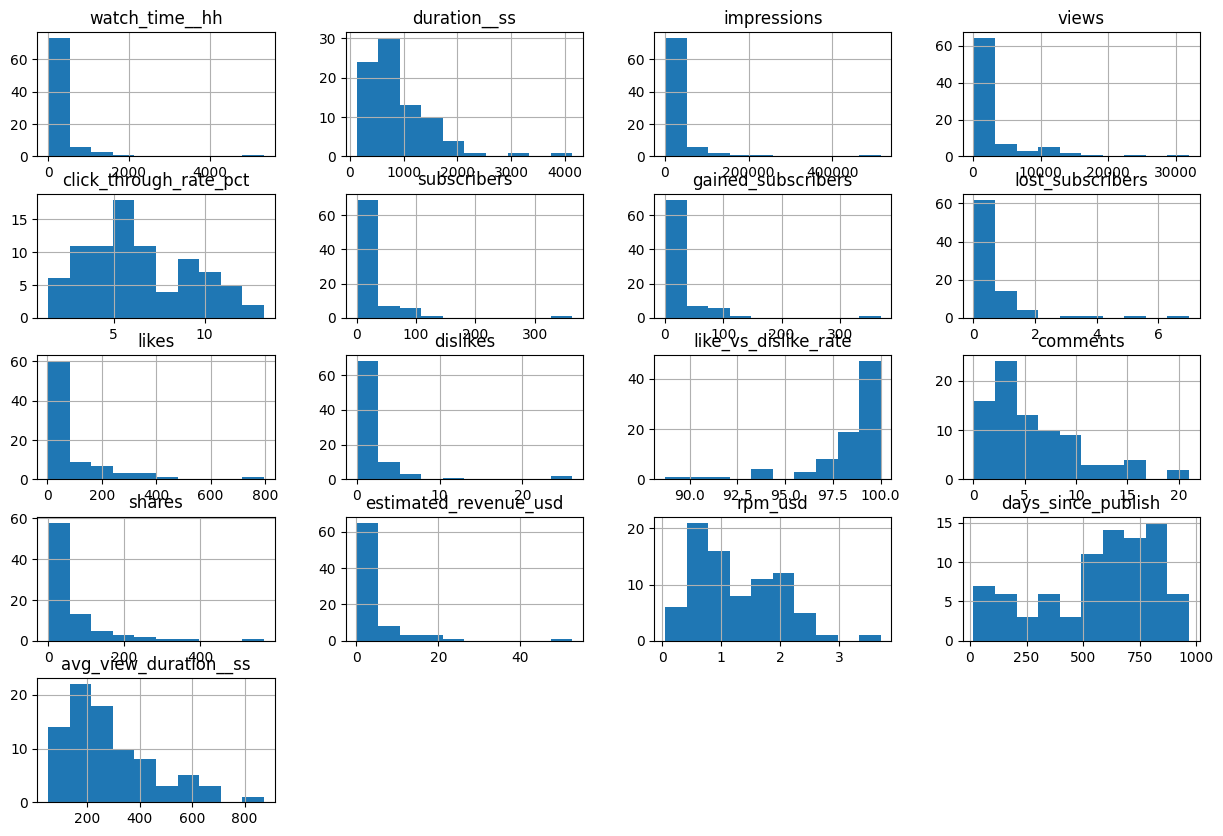

In [111]:
# Analisa todas as vari√°veis num√©ricas de uma s√≥ vez - Histograma

stg__gastronomades[numeric_columns].hist(figsize=(15,10))
plt.show()

Interpreta√ß√£o: O gr√°fico evidenciou a assimatria de todas as vari√°veis, n√£o parecendo existir uma distribui√ß√£o normal para nenhum dos atributos num√©ricos.

In [112]:
# Analisa todas as vari√°veis num√©ricas de uma s√≥ vez - Kernel

stg__gastronomades[numeric_columns].plot(kind='density', subplots=True, layout=(6,3), sharex=False, figsize=(15,10))
plt.show()

Interpreta√ß√£o: O gr√°fico evidenciou com mais precis√£o a assimetria dos dados, por√©m este ajuste foi um pouco incoerente para v√°rias vari√°veis cuja m√©trica foi modelada com possibilidade de valor negativo, o que na pr√°tica n√£o faz sentido. Por exemplo, um v√≠deo n√£o pode ter receita negativa, nem coment√°rio, etc.

In [113]:
# Analisa todas as vari√°veis num√©ricas de uma s√≥ vez - Boxplot

stg__gastronomades[numeric_columns].plot(kind='box', subplots=True, layout=(6,3), sharex=False, sharey=False, figsize=(15,10))
plt.show()

Interpreta√ß√£o: o gr√°fico mostrou a presen√ßa de outliers na maioria dos gr√°ficos, o que n√£o √© positivo pra an√°lise, por√©m √© "entend√≠vel" a n√≠vel de neg√≥cio. Pois o canal n√£o tem muito tempo, fizemos muitos testes e s√≥ nos √∫ltimos 6 meses que temos postados v√≠deos mais consistentes/homog√™nos, com um certo padr√£o e estilo.

### Vari√°veis categ√≥ricas


/tmp/ipython-input-114-3705196641.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')


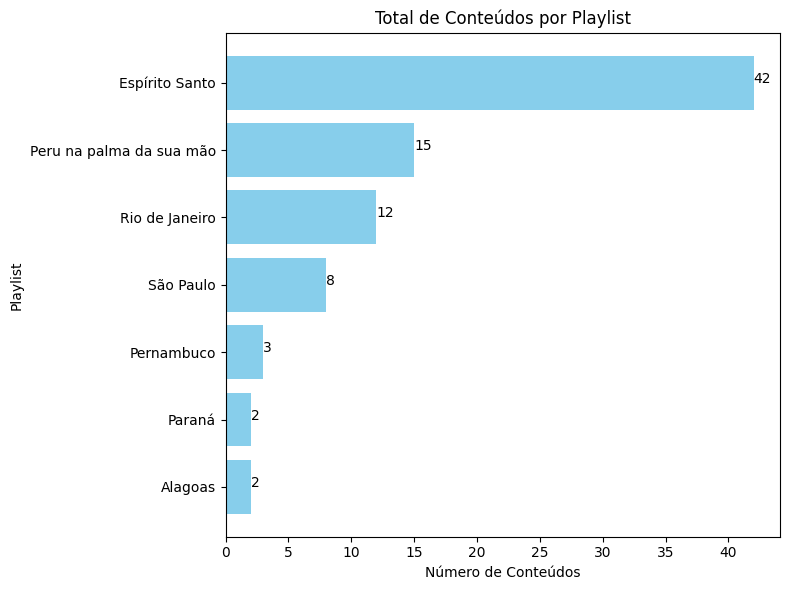

In [114]:
import matplotlib.pyplot as plt

# Primeiro: crie uma contagem por playlist
playlist_counts = (
    stg__gastronomades
    .groupby('playlist')
    .size()
    .sort_values(ascending=True)  # ascending=True para lista vertical do menor pro maior
)

# Criando o gr√°fico de barras horizontais
plt.figure(figsize=(8, 6))
plt.barh(playlist_counts.index, playlist_counts.values, color='skyblue')

# T√≠tulos e legendas
plt.title("Total de Conte√∫dos por Playlist")
plt.xlabel("N√∫mero de Conte√∫dos")
plt.ylabel("Playlist")

# Exibir valores no final das barras (opcional)
for index, value in enumerate(playlist_counts.values):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()


Interpreta√ß√£o: A maioria dos v√≠deos s√£o do Esp√≠rito Santo, seguidos pelo Peru e pelo Rio de Janeiro.

In [115]:
# Vari√°vel: views

#resumo das stats
stg__gastronomades['views'].describe()

# identifica√ß√£o de registros que chamaram a aten√ß√£o
stg__gastronomades[stg__gastronomades['views']==64]

content_id     content_name                  playlist publish_date  \
83  v2KhSWdeQVg  CASAMOS NO PER√ö  Peru na palma da sua m√£o   2024-01-09   

    watch_time__hh avg_view_duration  duration__ss  impressions  views  \
83          0.9137           0:00:51           123          570     64   

    click_through_rate_pct  ...  likes  dislikes  like_vs_dislike_rate  \
83                    5.61  ...      3         0                 100.0   

    comments  shares  estimated_revenue_usd  rpm_usd  days_since_publish  \
83         0       0                  0.035    0.547                 538   

    avg_view_duration__ss  copyright_flag  
83                     51           False  

[1 rows x 23 columns]

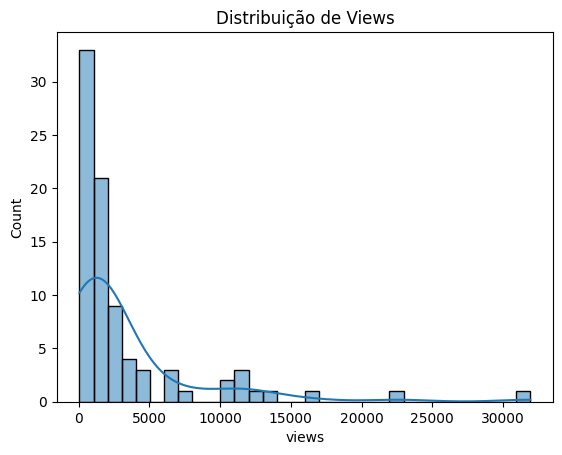

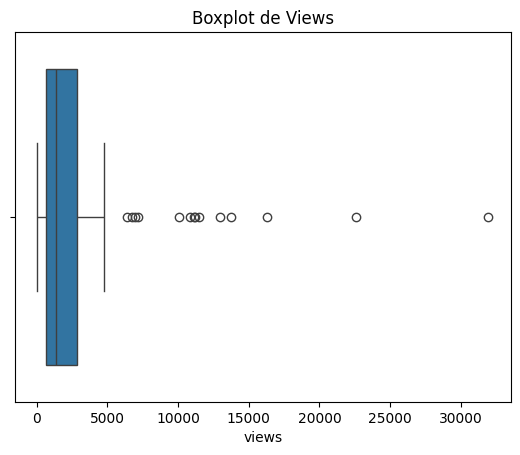

In [116]:
stg__gastronomades['views'].describe()

# Histograma
sns.histplot(stg__gastronomades['views'], kde=True)
plt.title('Distribui√ß√£o de Views')
plt.show()

# Boxplot
sns.boxplot(x=stg__gastronomades['views'])
plt.title('Boxplot de Views')
plt.show()

## An√°lise Bivariada


### Playlist vs M√©tricas de alcance

In [117]:
# Impress√µes por playlist


# Calcula m√©dia, mediana e desvio padr√£o por playlist
impressions_stats = (
    stg__gastronomades
    .groupby('playlist')['impressions']
    .agg(['sum','mean', 'median','max','std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estat√≠sticas de Impress√µes por Playlist:\n")
print(impressions_stats)



# Gr√°fico
# Define o tamanho do gr√°fico
plt.figure(figsize=(12, 6))

# Cria o boxplot: Playlist no eixo X, Impress√µes no eixo Y
sns.boxplot(
    data=stg__gastronomades,
    x='playlist',       # playlist agora √© eixo x
    y='impressions',    # impress√µes eixo y
    palette='Set3',     # define paleta de cores para diferenciar playlists
    showmeans=True
)

# T√≠tulos e labels
plt.title('Distribui√ß√£o de Impress√µes por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Impress√µes')

plt.xticks(rotation=45)  # Rotaciona labels se tiverem nomes grandes
plt.tight_layout()
plt.show()


# Exibe outliers manulmente
stg__gastronomades[stg__gastronomades['impressions'].isin([515258,253246,132731,96767,30811,89963,44635])][['playlist','content_name','avg_view_duration','impressions']]

/tmp/ipython-input-117-4134836498.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['impressions']
/tmp/ipython-input-117-4134836498.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estat√≠sticas de Impress√µes por Playlist:

                   playlist     sum      mean    median     max       std
2                    Paran√°  518974  259487.0  259487.0  515258  361714.8
0                   Alagoas  210586  105293.0  105293.0  132731   38803.2
5            Rio de Janeiro  716732   59727.7   12503.0  253246   80208.0
6                 S√£o Paulo  179638   22454.8   14031.0   96767   30612.8
3                Pernambuco   67268   22422.7   27747.0   30811   11973.9
1            Esp√≠rito Santo  795715   18945.6   10743.0   89963   21204.1
4  Peru na palma da sua m√£o  144186    9612.4    5194.0   44635   12541.2


playlist  \
0                     Paran√°   
1                    Alagoas   
2             Rio de Janeiro   
5             Esp√≠rito Santo   
12  Peru na palma da sua m√£o   
14                 S√£o Paulo   
43                Pernambuco   

                                         content_name avg_view_duration  \
0   O melhor da GASTRONOMIA CURITIBANA | Onde COME...           0:10:02   
1   Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...           0:11:23   
2       ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS           0:05:30   
5   O que fazer em SANTA TERESA | O MELHOR do Circ...           0:04:42   
12  ONDE COMER em CUSCO PERU | Os Melhores Restaur...           0:06:07   
14  O MELHOR Parque de Trampolim de S√£o Paulo | Im...           0:02:12   
43   RECIFE √© o MELHOR destino gastron√¥mico do Brasil           0:08:09   

    impressions  
0        515258  
1        132731  
2        253246  
5         89963  
12        44635  
14        96767  
43        30811

Interpreta√ß√£o: Em m√©dia, os v√≠deos que mais tiveram impress√µes foram dos estados: Paran√° e Alagoas, por√©m em ambos temos apenas 2 v√≠deos na playlist, o que torna a m√©dia um pouco ineficaz, assim como a mediana. Em contra partida, o Esp√≠rito Santo, onde moramos, √© o estado com mais v√≠deos e o segundo menor n√∫mero mediano de impress√µes. Ser√° que isso pode significar que o estado n√£o tem procura turistica?
<br><br><br>
Destaques:
- O v√≠deo de Pernambuco com maior n√∫mero de impress√µes √© o de Gastronomia, ou seja, imprimiu mais que Carneiros e Porto de Galinhas. Ser√° que o mau desempenho pode ter a ver com a escolha das thumbs?
<br><br><br>
Obs: Alta variabilidade do Paran√° > Sabemos que √© de Curitiba o v√≠deo do canal com melhor engajamento, alcance e receita.


/tmp/ipython-input-118-4196738248.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['views']
/tmp/ipython-input-118-4196738248.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estat√≠sticas de Views por Playlist:

                   playlist     sum     mean   median    max      std
2                    Paran√°   32389  16194.5  16194.5  31933  22257.6
0                   Alagoas   18180   9090.0   9090.0  11215   3005.2
5            Rio de Janeiro   73360   6113.3   1906.5  22554   7294.7
6                 S√£o Paulo   21579   2697.4   1834.5  11472   3661.5
1            Esp√≠rito Santo  111068   2644.5   1559.0  13733   3283.7
3                Pernambuco    3658   1219.3    855.0   2165    826.1
4  Peru na palma da sua m√£o   17411   1160.7    777.0   4427   1225.4


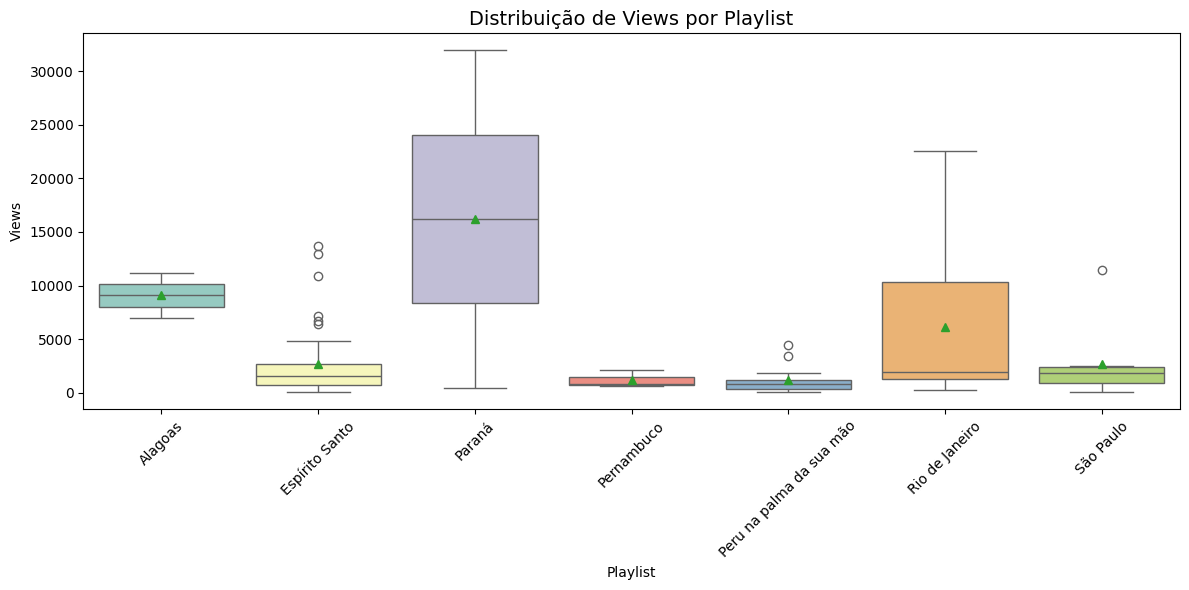

playlist  \
0                     Paran√°   
1                    Alagoas   
3             Esp√≠rito Santo   
7             Rio de Janeiro   
12  Peru na palma da sua m√£o   
14                 S√£o Paulo   
19                Pernambuco   

                                         content_name avg_view_duration  views  
0   O melhor da GASTRONOMIA CURITIBANA | Onde COME...           0:10:02  31933  
1   Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...           0:11:23  11215  
3   Conhe√ßa as MONTANHAS de GUARAPARI | O MELHOR d...           0:04:45  13733  
7      VISITAMOS A MENOR PRAIA DE NUDISMO DO BRASIL üò±           0:02:07  22554  
12  ONDE COMER em CUSCO PERU | Os Melhores Restaur...           0:06:07   4427  
14  O MELHOR Parque de Trampolim de S√£o Paulo | Im...           0:02:12  11472  
19  Descubra PORTO de GALINHAS | O VILAREJO mais i...           0:09:15   2165

In [118]:
# Views por playlist

# Calcula soma, m√©dia, mediana, m√°ximo e desvio padr√£o por playlist
views_stats = (
    stg__gastronomades
    .groupby('playlist')['views']
    .agg(['sum','mean', 'median','max','std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estat√≠sticas de Views por Playlist:\n")
print(views_stats)

# Gr√°fico
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',      # playlist eixo X
    y='views',         # views eixo Y
    palette='Set3',
    showmeans=True
)

plt.title('Distribui√ß√£o de Views por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Views')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibe v√≠deos com valores altos de views (substitua esses valores conforme os outliers reais que quiser analisar)
stg__gastronomades[stg__gastronomades['views'].isin([31933, 11215   , 22554, 11472, 13733   , 2165    , 4427   ])][['playlist','content_name','avg_view_duration','views']]


Interpreta√ß√£o: Em m√©dia, os v√≠deos que mais tiveram visualiza√ß√µes foram dos estados: Paran√° e Alagoas enquanto que as piores foram do Peru e Pernambuco.
<br><br><br>
Destaques:
- Maior n√∫mero de views no ES √© do v√≠deo de Guarapari antigo da Rota da Ferradura
- Porto de Galinhas tem o maior n√∫mero de views de Pernambuco.


In [119]:
# Taxa de cliques por playlist

# Calcula soma, m√©dia, mediana, m√°ximo e desvio padr√£o por playlist
ctr_stats = (
    stg__gastronomades
    .groupby('playlist')['click_through_rate_pct']
    .agg(['sum','mean', 'median','max','min','std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(2)
)

print("Estat√≠sticas de Taxa de Cliques de Impress√µes (%) por Playlist:\n")
print(ctr_stats)

# Gr√°fico
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='click_through_rate_pct',
    palette='Set3',
    showmeans=True
)

plt.title('Distribui√ß√£o da Taxa de Cliques de Impress√µes por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Taxa de Cliques de Impress√µes (%)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibe v√≠deos com valores altos de CTR (exemplo de valores - ajuste se quiser)

#melhor taxa de cliques
stg__gastronomades[
    stg__gastronomades['click_through_rate_pct'].isin([12.41, 11.46, 11.42, 13.26, 5.80, 3.92,4.91])
][['playlist','content_name','avg_view_duration','click_through_rate_pct']]

#pior taxa de cliques
#stg__gastronomades[
    ##stg__gastronomades['click_through_rate_pct'].isin([2.81,1.4,3.57,2.29,5.69,3.44,1.42])
#][['playlist','content_name','avg_view_duration','click_through_rate_pct']]


/tmp/ipython-input-119-83623718.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['click_through_rate_pct']
/tmp/ipython-input-119-83623718.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estat√≠sticas de Taxa de Cliques de Impress√µes (%) por Playlist:

                   playlist     sum  mean  median    max   min   std
5            Rio de Janeiro   88.19  7.35    7.84  12.41  2.81  3.26
1            Esp√≠rito Santo  279.47  6.65    6.54  11.46  1.40  2.82
4  Peru na palma da sua m√£o   92.43  6.16    5.61  11.42  3.57  2.16
6                 S√£o Paulo   48.02  6.00    4.94  13.26  2.29  3.91
0                   Alagoas   11.49  5.74    5.74   5.80  5.69  0.08
2                    Paran√°    7.36  3.68    3.68   3.92  3.44  0.34
3                Pernambuco   10.77  3.59    4.44   4.91  1.42  1.89


playlist  \
0                     Paran√°   
4                    Alagoas   
7             Rio de Janeiro   
19                Pernambuco   
45            Esp√≠rito Santo   
47                 S√£o Paulo   
52  Peru na palma da sua m√£o   

                                         content_name avg_view_duration  \
0   O melhor da GASTRONOMIA CURITIBANA | Onde COME...           0:10:02   
4   O que fazer em Milagres | O MELHOR da Rota Eco...           0:09:22   
7      VISITAMOS A MENOR PRAIA DE NUDISMO DO BRASIL üò±           0:02:07   
19  Descubra PORTO de GALINHAS | O VILAREJO mais i...           0:09:15   
45        LAVAND√ÅRIO ROTA DA PEDRA EM PEDRA AZUL - ES           0:02:39   
47      CAL√áAD√ÉO URBAN√ìIDE NA RUA AUGUSTA - S√ÉO PAULO           0:01:44   
52  Descubra onde se HOSPEDAR em Cusco PERU | Hote...           0:03:13   

    click_through_rate_pct  
0                     3.92  
4                     5.80  
7                    12.41  
19                    4.91  
45                   11.46  
47                   13.26  
52                   11.42

Interpreta√ß√£o: Em m√©dia, os v√≠deos que mais tiveram taxas de cliques altas foram dos estados: Rio de Janeiro, Esp√≠rito Santo e Peru. A mediana confirma RJ e ES, mas tira Peru e coloca Alagoas no top 3. Em contra partida, Paran√° e Pernambuco tem as piores taxas, provavelmente isso tenha associa√ß√£o com o fato de terem tido o maior n√∫mero de impress√µes.
<br><br><br>
Destaques:
- O v√≠deo do RJ com maior taxa de cliques √© o de Nudismo
- O v√≠deo do ES com maior taxa de cliques √© o do Lavand√°rio
- O v√≠deo de SP com maior taxa de cliques √© Cal√ßad√£o Urbanoide
- O v√≠deo do Peru com a maior taxa de cliques √© de hotel, do Casona Plaza

- o v√≠deo de Ibira√ß√∫ teve a pior taxa de cliques do canal, ao lado do de Recife
- V√≠deo da Carlos Bakery e Roteiro de B√∫zios de 1h tamb√©m foram bem ruins

### Playlist vs M√©tricas de engajamento

/tmp/ipython-input-120-3652471593.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['subscribers']
/tmp/ipython-input-120-3652471593.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estat√≠sticas de Inscritos por Playlist:

                   playlist  sum   mean  median  max    std
2                    Paran√°  370  185.0   185.0  363  251.7
0                   Alagoas  156   78.0    78.0   86   11.3
5            Rio de Janeiro  479   39.9    13.5  131   44.2
1            Esp√≠rito Santo  818   19.5    11.5   86   22.2
6                 S√£o Paulo   86   10.8     7.0   45   14.9
3                Pernambuco   25    8.3     6.0   13    4.0
4  Peru na palma da sua m√£o  103    6.9     3.0   26    8.4


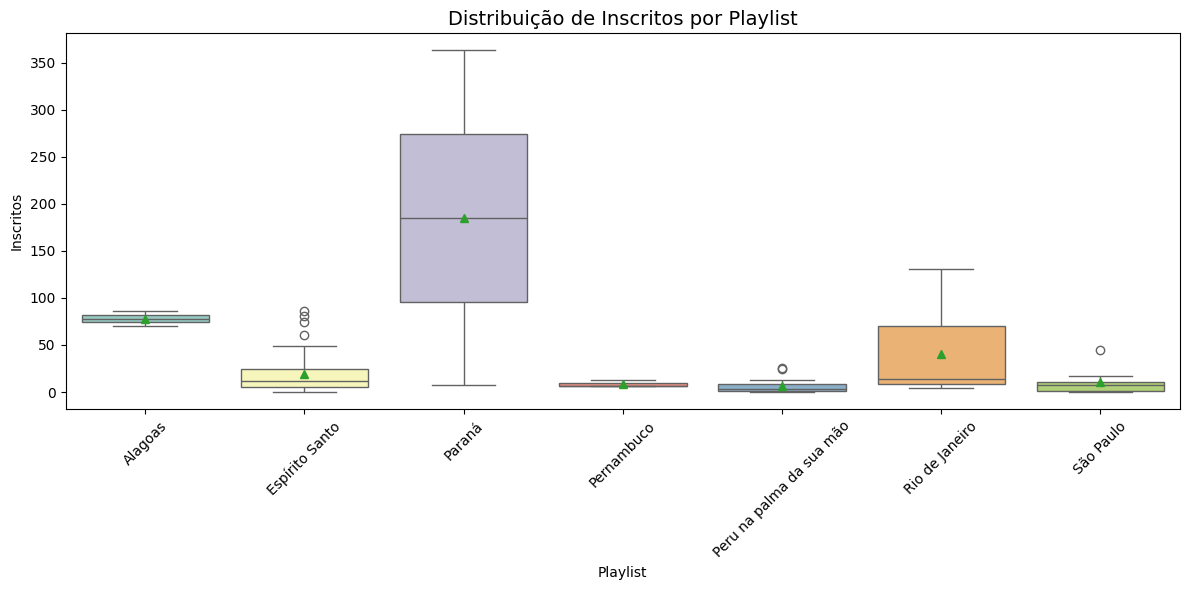

playlist  \
0                     Paran√°   
4                    Alagoas   
5             Esp√≠rito Santo   
7             Rio de Janeiro   
13  Peru na palma da sua m√£o   
14                 S√£o Paulo   
19                Pernambuco   
28  Peru na palma da sua m√£o   
30            Esp√≠rito Santo   

                                         content_name avg_view_duration  \
0   O melhor da GASTRONOMIA CURITIBANA | Onde COME...           0:10:02   
4   O que fazer em Milagres | O MELHOR da Rota Eco...           0:09:22   
5   O que fazer em SANTA TERESA | O MELHOR do Circ...           0:04:42   
7      VISITAMOS A MENOR PRAIA DE NUDISMO DO BRASIL üò±           0:02:07   
13  O que comer em CUSCO PERU | Comida de Rua e Su...           0:07:38   
14  O MELHOR Parque de Trampolim de S√£o Paulo | Im...           0:02:12   
19  Descubra PORTO de GALINHAS | O VILAREJO mais i...           0:09:15   
28  Tudo que voc√™ PRECISA SABER antes de viajar pa...           0:04:32   
30  CONDOM√çNIO VISTA AZUL + HOSPEDAGEM EM PEDRA AZ...           0:04:24   

    subscribers  
0           363  
4            86  
5            86  
7           131  
13           26  
14           45  
19           13  
28           13  
30           13

In [120]:
# Inscritos por playlist

# Calcula soma, m√©dia, mediana, m√°ximo e desvio padr√£o por playlist
subscribers_stats = (
    stg__gastronomades
    .groupby('playlist')['subscribers']
    .agg(['sum', 'mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estat√≠sticas de Inscritos por Playlist:\n")
print(subscribers_stats)

# Gr√°fico
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='subscribers',
    palette='Set3',
    showmeans=True
)

plt.title('Distribui√ß√£o de Inscritos por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Inscritos')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibe v√≠deos com valores altos de inscritos (exemplo de valores - ajuste se quiser)
stg__gastronomades[
    stg__gastronomades['subscribers'].isin([363, 86, 131,45,13,26   ])  # troque pelos maiores do seu dataset
][['playlist','content_name','avg_view_duration','subscribers']]


Interpreta√ß√£o: Em m√©dia, os v√≠deos com maior saldo de inscritos obtidos foram do Alagoas, Esp√≠rito Santo, Rio de Janeiro e Paran√°. Esp√≠rito Santo se destaca pela quantidade de v√≠deos (pelo menos 3x mais que outros estados), Rio de Janeiro pelo da Praia de Nudismo e Paran√° Curitiba por causa do v√≠deo de gastronomia.
<br><br><br>
Destaques:
- O v√≠deo que mais saldo de inscrito foi o de Gastronomia Curitibana e, na sequ√™ncia um do Circuito Caravaggio em Santa Teresa, no ES. Vale dar uma olhada se pedimos pra se inscrever de alguma forma espec√≠fica ou em algum momento quente do v√≠deo.
- Pernambuco foi o estado com pior saldo de inscritos do canal.
- O v√≠deo de Milagres deu mais inscrito do que o de Maragogi, ser√° que pedimos pra se inscrever de uma forma diferente?


/tmp/ipython-input-121-1582032666.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['lost_subscribers']
/tmp/ipython-input-121-1582032666.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estat√≠sticas de Inscritos Perdidos por Playlist:

                   playlist  sum  mean  median  max  std
2                    Paran√°    7   3.5     3.5    7  4.9
0                   Alagoas    3   1.5     1.5    3  2.1
5            Rio de Janeiro   14   1.2     0.5    5  1.7
3                Pernambuco    2   0.7     0.0    2  1.2
1            Esp√≠rito Santo   12   0.3     0.0    2  0.6
4  Peru na palma da sua m√£o    2   0.1     0.0    1  0.4
6                 S√£o Paulo    1   0.1     0.0    1  0.4


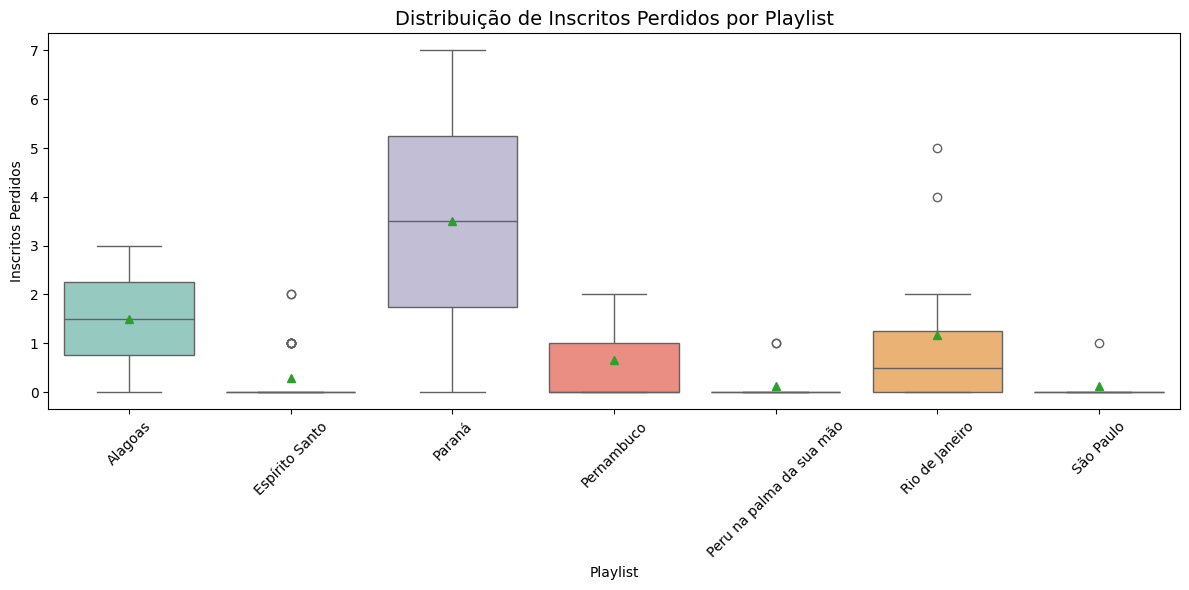

playlist                                       content_name  \
0          Paran√°  O melhor da GASTRONOMIA CURITIBANA | Onde COME...   
1         Alagoas  Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...   
7  Rio de Janeiro     VISITAMOS A MENOR PRAIA DE NUDISMO DO BRASIL üò±   

  avg_view_duration  lost_subscribers  
0           0:10:02                 7  
1           0:11:23                 3  
7           0:02:07                 5

In [121]:
# Inscritos Perdidos por playlist

# Calcula soma, m√©dia, mediana, m√°ximo e desvio padr√£o por playlist
lost_subscribers_stats = (
    stg__gastronomades
    .groupby('playlist')['lost_subscribers']
    .agg(['sum', 'mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estat√≠sticas de Inscritos Perdidos por Playlist:\n")
print(lost_subscribers_stats)

# Gr√°fico
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='lost_subscribers',
    palette='Set3',
    showmeans=True
)

plt.title('Distribui√ß√£o de Inscritos Perdidos por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Inscritos Perdidos')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibe v√≠deos com valores altos de inscritos perdidos (substitua pelos maiores do seu dataset)
stg__gastronomades[
    stg__gastronomades['lost_subscribers'].isin([7,5,3])  # ajuste conforme o max que aparecer
][['playlist','content_name','avg_view_duration','lost_subscribers']]


/tmp/ipython-input-122-2024110136.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['watch_time__hh']
/tmp/ipython-input-122-2024110136.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estat√≠sticas de Tempo Total de Visualiza√ß√£o (horas) por Playlist:

                   playlist     sum     min    mean  median     max     std
2                    Paran√°  5394.6    51.6  2697.3  2697.3  5343.0  3741.6
0                   Alagoas  3216.4  1087.7  1608.2  1608.2  2128.7   736.1
5            Rio de Janeiro  4838.2    17.4   403.2   148.0  1495.7   460.5
3                Pernambuco   579.7    86.7   193.2   158.7   334.3   127.3
1            Esp√≠rito Santo  8035.3     4.1   191.3    87.1  1090.3   261.7
6                 S√£o Paulo  1047.8     4.5   131.0    57.1   420.9   162.3
4  Peru na palma da sua m√£o  1684.0     0.9   112.3    69.0   452.2   139.8


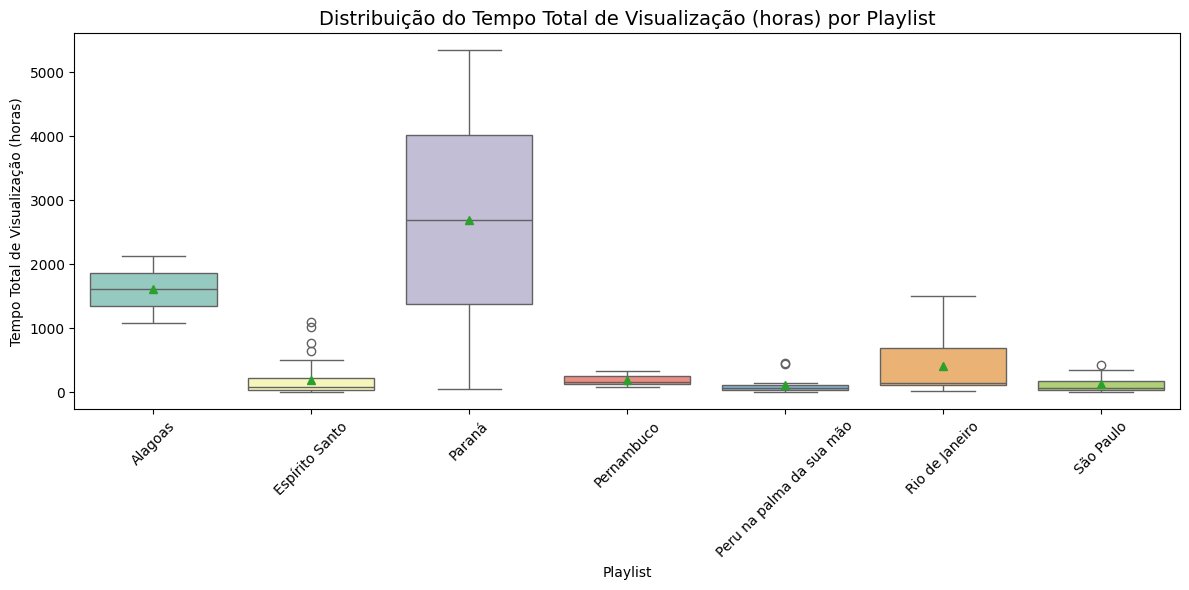

playlist                                       content_name  \
0          Paran√°  O melhor da GASTRONOMIA CURITIBANA | Onde COME...   
1         Alagoas  Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...   
2  Rio de Janeiro      ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS   
3  Esp√≠rito Santo  Conhe√ßa as MONTANHAS de GUARAPARI | O MELHOR d...   

  avg_view_duration  watch_time__hh  
0           0:10:02       5343.0193  
1           0:11:23       2128.7062  
2           0:05:30       1495.6786  
3           0:04:45       1090.3399

In [122]:
# üìä Estat√≠sticas de Tempo Total de Visualiza√ß√£o (horas) por Playlist

# Calcula soma, m√©dia, mediana, m√°ximo e desvio padr√£o
watch_time_stats = (
    stg__gastronomades
    .groupby('playlist')['watch_time__hh']
    .agg(['sum','min', 'mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estat√≠sticas de Tempo Total de Visualiza√ß√£o (horas) por Playlist:\n")
print(watch_time_stats)

# üìà Gr√°fico Boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='watch_time__hh',
    palette='Set3',
    showmeans=True
)

plt.title('Distribui√ß√£o do Tempo Total de Visualiza√ß√£o (horas) por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Tempo Total de Visualiza√ß√£o (horas)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#top v√≠deos independente da playlist
#top_watch_time = (
#    stg__gastronomades
#    .nlargest(10, 'watch_time__hh')
#    [['content_name', 'watch_time__hh']]
#)
#
#print("\nTop 5 v√≠deos com maior Tempo Total de Visualiza√ß√£o (horas):\n")
#print(top_watch_time)


# V√≠deos com maior tempo de visualiza√ß√£o
stg__gastronomades[
    stg__gastronomades['watch_time__hh'].isin([5343.0193,2128.7062,1495.6786,1090.3399])  # ajuste conforme o max que aparecer
][['playlist','content_name','avg_view_duration','watch_time__hh']]

/tmp/ipython-input-123-3225414685.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['likes']
/tmp/ipython-input-123-3225414685.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estat√≠sticas de Likes por Playlist:

                   playlist   sum   mean  median  max    std
2                    Paran√°   827  413.5   413.5  796  540.9
0                   Alagoas   501  250.5   250.5  275   34.6
5            Rio de Janeiro  1401  116.8    52.0  333  108.3
1            Esp√≠rito Santo  3634   86.5    49.0  409   95.0
6                 S√£o Paulo   379   47.4    39.5  167   50.6
3                Pernambuco   138   46.0    44.0   61   14.1
4  Peru na palma da sua m√£o   632   42.1    29.0  146   41.7


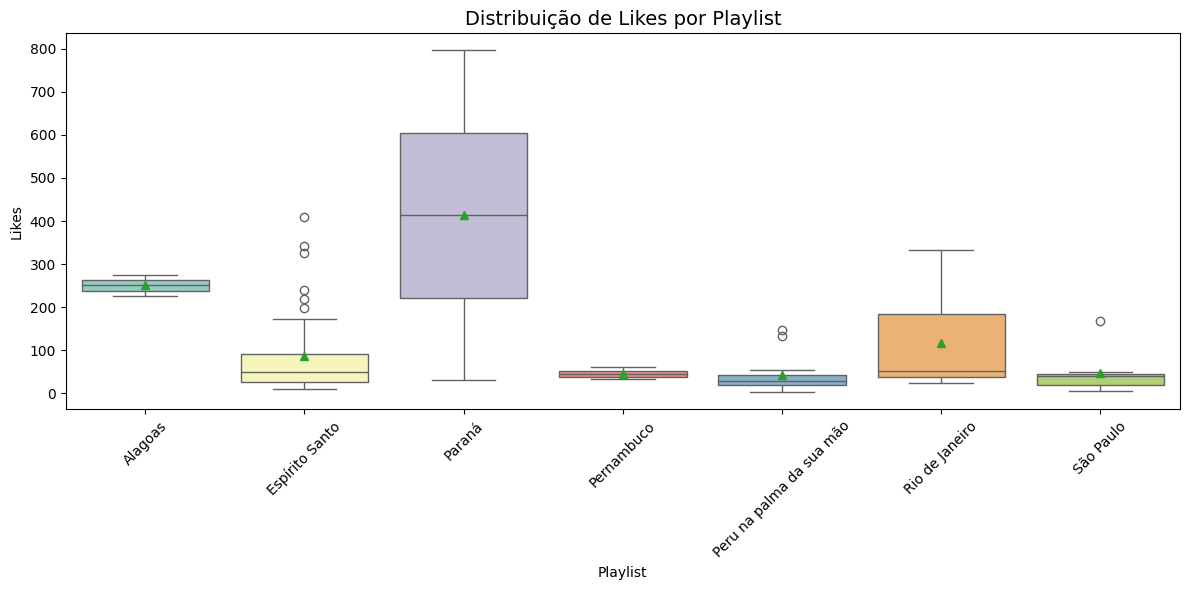

playlist  \
0                     Paran√°   
1                    Alagoas   
2             Rio de Janeiro   
5             Esp√≠rito Santo   
12  Peru na palma da sua m√£o   
14                 S√£o Paulo   
19                Pernambuco   

                                         content_name avg_view_duration  likes  
0   O melhor da GASTRONOMIA CURITIBANA | Onde COME...           0:10:02    796  
1   Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...           0:11:23    275  
2       ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS           0:05:30    333  
5   O que fazer em SANTA TERESA | O MELHOR do Circ...           0:04:42    409  
12  ONDE COMER em CUSCO PERU | Os Melhores Restaur...           0:06:07    146  
14  O MELHOR Parque de Trampolim de S√£o Paulo | Im...           0:02:12    167  
19  Descubra PORTO de GALINHAS | O VILAREJO mais i...           0:09:15     61

In [123]:
# Likes por playlist

# üìä Calcula soma, m√©dia, mediana, m√°ximo e desvio padr√£o por playlist
likes_stats = (
    stg__gastronomades
    .groupby('playlist')['likes']
    .agg(['sum', 'mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estat√≠sticas de Likes por Playlist:\n")
print(likes_stats)

# üìà Gr√°fico Boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='likes',
    palette='Set3',
    showmeans=True
)

plt.title('Distribui√ß√£o de Likes por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Likes')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# üëÄ Exibe v√≠deos com valores altos de Likes (ajuste conforme o seu dataset)
# Dica: pode usar top N autom√°ticos tamb√©m!
stg__gastronomades[
    stg__gastronomades['likes'].isin([796, 275, 333,409,167,61,146])  # Substitua pelos valores mais altos que aparecerem no seu caso
][['playlist','content_name','avg_view_duration','likes']]


Interpreta√ß√£o: A melhor m√©dia de likes √© para os estados de Paran√° e Alagoas. O ES tem uma m√©dia de likes baixa por v√≠deo.
<br><br><br>
Destaques:
- O v√≠deo do Peru com mais likes √© o de restaurantes
- O v√≠deo do ES com mais likes √© o do Circuito Caravaggio, o mesmo que teve destaque anteriormente
- O v√≠deo de Gastronomia Curitibana tem o maior n√∫mero de likes do canal


In [124]:
# üëé Dislikes por playlist

# üìä Calcula soma, m√©dia, mediana, m√°ximo e desvio padr√£o por playlist
dislikes_stats = (
    stg__gastronomades
    .groupby('playlist')['dislikes']
    .agg(['sum', 'mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estat√≠sticas de Dislikes por Playlist:\n")
print(dislikes_stats)

# üìà Gr√°fico Boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='dislikes',
    palette='Set3',
    showmeans=True
)

plt.title('Distribui√ß√£o de Dislikes por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Dislikes')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# üëÄ Exibe v√≠deos com valores altos de Dislikes (substitua pelos valores mais altos do seu dataset)
stg__gastronomades[
    stg__gastronomades['dislikes'].isin([25,26,6,4])  # Ajuste conforme os valores reais
][['playlist','content_name','avg_view_duration','dislikes']]


/tmp/ipython-input-124-846595018.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['dislikes']
/tmp/ipython-input-124-846595018.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estat√≠sticas de Dislikes por Playlist:

                   playlist  sum  mean  median  max   std
2                    Paran√°   25  12.5    12.5   25  17.7
5            Rio de Janeiro   51   4.2     1.0   26   7.7
0                   Alagoas    8   4.0     4.0    6   2.8
3                Pernambuco    6   2.0     2.0    4   2.0
1            Esp√≠rito Santo   49   1.2     0.5    6   1.6
6                 S√£o Paulo    7   0.9     1.0    2   0.8
4  Peru na palma da sua m√£o    6   0.4     0.0    3   1.1


playlist                                       content_name  \
0           Paran√°  O melhor da GASTRONOMIA CURITIBANA | Onde COME...   
1          Alagoas  Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...   
3   Esp√≠rito Santo  Conhe√ßa as MONTANHAS de GUARAPARI | O MELHOR d...   
7   Rio de Janeiro     VISITAMOS A MENOR PRAIA DE NUDISMO DO BRASIL üò±   
10  Esp√≠rito Santo    Hospedagem CHAL√â CONTAINER em SANTA TERESA - ES   
19      Pernambuco  Descubra PORTO de GALINHAS | O VILAREJO mais i...   
23  Esp√≠rito Santo                         LAVAND√ÅRIO PEDRA AZUL - ES   
33  Esp√≠rito Santo  Descubra a CACHOEIRA de MATILDE em Alfredo Cha...   

   avg_view_duration  dislikes  
0            0:10:02        25  
1            0:11:23         6  
3            0:04:45         6  
7            0:02:07        26  
10           0:03:34         6  
19           0:09:15         4  
23           0:02:53         4  
33           0:02:32         4

Interpreta√ß√£o: Rio de Janeiro e Esp√≠rito Santo lideram o ranking de dislikes, com destaques para o v√≠deo de Nudismo do RJ. Outro v√≠deo que apresentou muito dislike foi o de Gastronomia de Curitiba, mas √© aceit√°vel tendo em vista o alcance dele.


/tmp/ipython-input-125-1517508026.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['comments']
/tmp/ipython-input-125-1517508026.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estat√≠sticas de Coment√°rios por Playlist:

                   playlist  sum  mean  median  max  std
0                   Alagoas   28  14.0    14.0   15  1.4
2                    Paran√°   17   8.5     8.5   15  9.2
5            Rio de Janeiro   97   8.1     8.0   20  5.3
1            Esp√≠rito Santo  269   6.4     6.0   21  4.6
4  Peru na palma da sua m√£o   59   3.9     4.0    8  2.3
3                Pernambuco   11   3.7     4.0    4  0.6
6                 S√£o Paulo   25   3.1     3.0    8  2.5


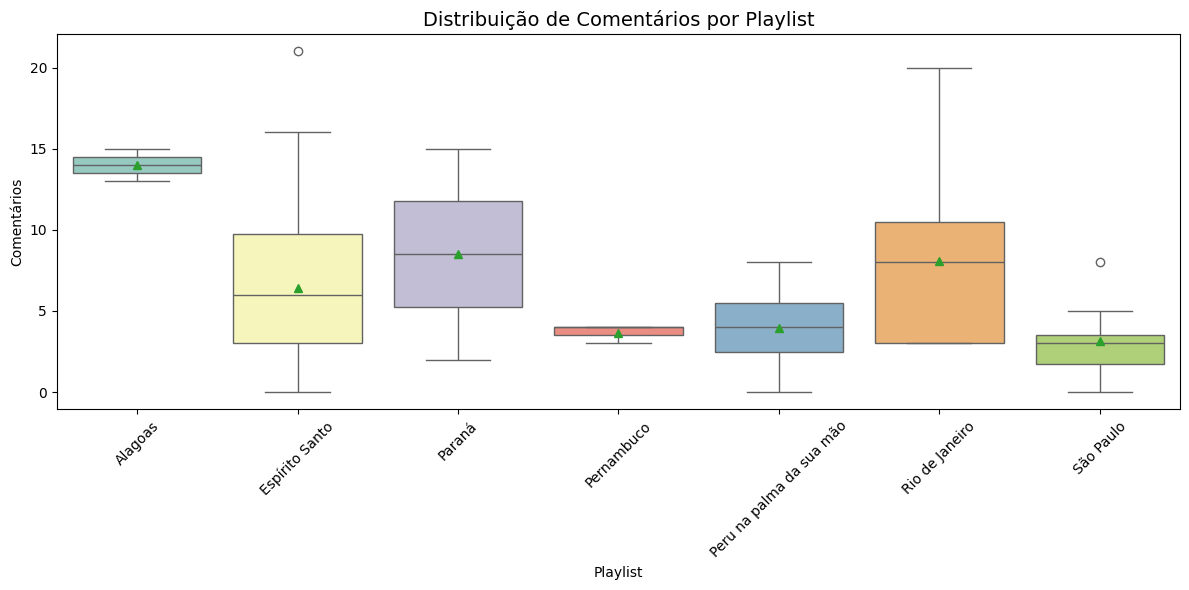

playlist                                       content_name  \
0           Paran√°  O melhor da GASTRONOMIA CURITIBANA | Onde COME...   
1          Alagoas  Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...   
7   Rio de Janeiro     VISITAMOS A MENOR PRAIA DE NUDISMO DO BRASIL üò±   
22  Esp√≠rito Santo  P√°scoa nas MONTANHAS CAPIXABAS | Domingos Mart...   
42  Esp√≠rito Santo  Descubra o bar do GALO | Bar TEM√ÅTICO do Atl√©t...   

   avg_view_duration  comments  
0            0:10:02        15  
1            0:11:23        15  
7            0:02:07        20  
22           0:03:41        21  
42           0:02:25        15

In [125]:
# üí¨ Coment√°rios por playlist

# üìä Calcula soma, m√©dia, mediana, m√°ximo e desvio padr√£o por playlist
comments_stats = (
    stg__gastronomades
    .groupby('playlist')['comments']
    .agg(['sum', 'mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estat√≠sticas de Coment√°rios por Playlist:\n")
print(comments_stats)

# üìà Gr√°fico Boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='comments',
    palette='Set3',
    showmeans=True
)

plt.title('Distribui√ß√£o de Coment√°rios por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Coment√°rios')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# üëÄ Exibe v√≠deos com valores altos de Coment√°rios (substitua pelos valores mais altos do seu dataset)
stg__gastronomades[
    stg__gastronomades['comments'].isin([21,20,15])  # Ajuste conforme os valores reais
][['playlist','content_name','avg_view_duration','comments']]


Interpreta√ß√£o: Esse √© o primeiro gr√°fico em que Paran√° n√£o fica em destaque. Na vis√£o geral, ES lidera com mais coment√°rios, mas vale lembrar que ES tem muitos v√≠deos. Em m√©dia, Alagoas tem a maior m√©dia de coment√°rios por v√≠deo, mas s√£o apenas 2 v√≠deos nessa playlist.
<br><br><br>
Destaques:
- O v√≠deo de P√°scoa de Domingos Martins no ES √© o v√≠deo com mais coment√°rios do canal, seguido do da Praia de Nudismo no RJ.



/tmp/ipython-input-126-3743082869.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['shares']
/tmp/ipython-input-126-3743082869.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estat√≠sticas de Compartilhamentos por Playlist:

                   playlist   sum   mean  median  max    std
2                    Paran√°   264  132.0   132.0  255  173.9
0                   Alagoas   168   84.0    84.0   85    1.4
1            Esp√≠rito Santo  3167   75.4    41.5  567  106.9
5            Rio de Janeiro   719   59.9    37.0  194   57.3
6                 S√£o Paulo   438   54.8    24.0  289   96.9
3                Pernambuco    36   12.0    13.0   18    6.6
4  Peru na palma da sua m√£o   177   11.8     8.0   57   13.7


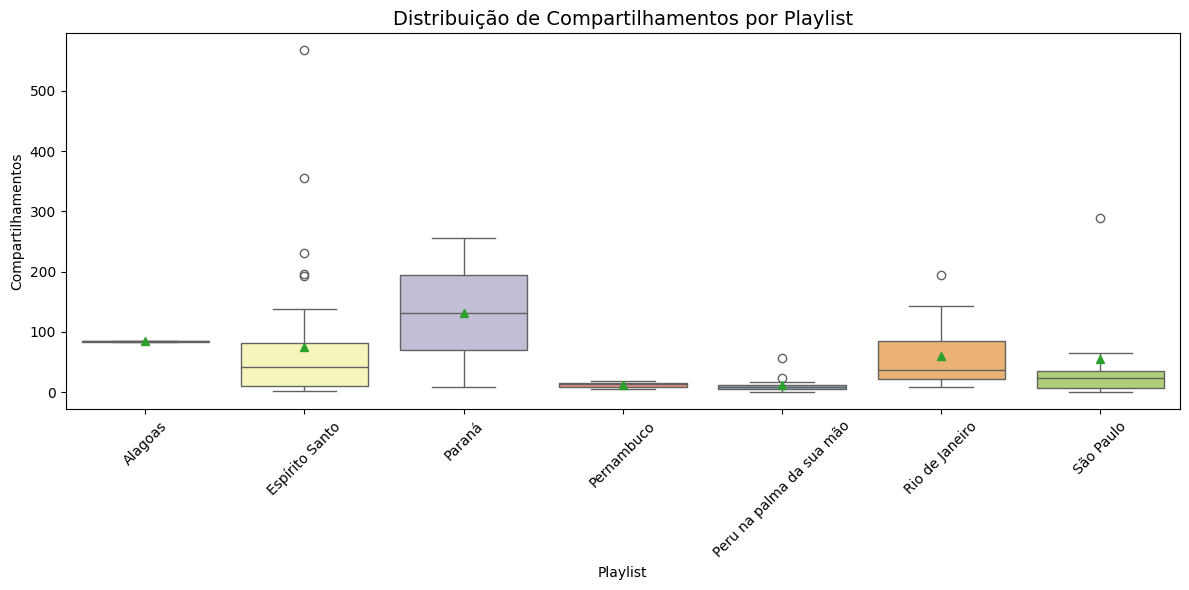

playlist  \
0                     Paran√°   
3             Esp√≠rito Santo   
4                    Alagoas   
9             Rio de Janeiro   
12  Peru na palma da sua m√£o   
14                 S√£o Paulo   
25                Pernambuco   

                                         content_name avg_view_duration  \
0   O melhor da GASTRONOMIA CURITIBANA | Onde COME...           0:10:02   
3   Conhe√ßa as MONTANHAS de GUARAPARI | O MELHOR d...           0:04:45   
4   O que fazer em Milagres | O MELHOR da Rota Eco...           0:09:22   
9   O que fazer em Arraial do Cabo | Quadriciclo n...           0:03:55   
12  ONDE COMER em CUSCO PERU | Os Melhores Restaur...           0:06:07   
14  O MELHOR Parque de Trampolim de S√£o Paulo | Im...           0:02:12   
25  Praia dos Carneiros | A PRAIA MAIS BONITA do B...           0:11:08   

    shares  
0      255  
3      567  
4       85  
9      194  
12      57  
14     289  
25      18

In [126]:
# üîó Compartilhamentos por playlist

# üìä Calcula soma, m√©dia, mediana, m√°ximo e desvio padr√£o por playlist
shares_stats = (
    stg__gastronomades
    .groupby('playlist')['shares']
    .agg(['sum', 'mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estat√≠sticas de Compartilhamentos por Playlist:\n")
print(shares_stats)

# üìà Gr√°fico Boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='shares',
    palette='Set3',
    showmeans=True
)

plt.title('Distribui√ß√£o de Compartilhamentos por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Compartilhamentos')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# üëÄ Exibe v√≠deos com valores altos de Compartilhamentos (ajuste conforme o seu dataset)
stg__gastronomades[
    stg__gastronomades['shares'].isin([567,289,255,194,85,57,18])  # Exemplo de outliers, ajuste conforme o seu
][['playlist','content_name','avg_view_duration','shares']]


Interpreta√ß√£o: O ES se destaca com maior n√∫mero de compartilhamentos, seguido de Rio de Janeiro
<br><br><br>
Destaques:
- O v√≠deo com maior n√∫mero de compartilhamentos do ES √© o antigo da Rota da Ferradura (outlier)
- O v√≠deo com maior n√∫mero de compartilhamentos do RJ √© o antigo de Arraial do Cabo (outlier)



In [127]:
# ‚è±Ô∏è Tempo M√©dio de Visualiza√ß√£o (segundos) por Playlist

# üìä Calcula soma, m√©dia, mediana, m√°ximo e desvio padr√£o por playlist
avg_view_duration_ss_stats = (
    stg__gastronomades
    .groupby('playlist')['avg_view_duration__ss']
    .agg(['mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(1)
)

print("Estat√≠sticas de Tempo M√©dio de Visualiza√ß√£o (segundos) por Playlist:\n")
print(avg_view_duration_ss_stats)

# üìà Gr√°fico Boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='avg_view_duration__ss',
    palette='Set3',
    showmeans=True
)

plt.title('Distribui√ß√£o do Tempo M√©dio de Visualiza√ß√£o (segundos) por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Tempo M√©dio de Visualiza√ß√£o (segundos)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# üëÄ Exibe v√≠deos com valores altos de tempo m√©dio de visualiza√ß√£o e a raz√£o do tempo m√©dio sobre o total do v√≠deo
(
    stg__gastronomades.loc[
        stg__gastronomades['avg_view_duration__ss'].isin([683, 668, 602, 644, 546, 613, 873]),
        ['playlist', 'content_name', 'avg_view_duration', 'avg_view_duration__ss', 'duration__ss']
    ]
    .assign(
        view_ratio = lambda df: round(df['avg_view_duration__ss'] / df['duration__ss'] * 100, 1)
    )
    [['playlist', 'content_name', 'avg_view_duration', 'view_ratio']]
)


/tmp/ipython-input-127-4204522993.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['avg_view_duration__ss']
/tmp/ipython-input-127-4204522993.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estat√≠sticas de Tempo M√©dio de Visualiza√ß√£o (segundos) por Playlist:

                   playlist   mean  median  max    std
0                   Alagoas  622.5   622.5  683   85.6
3                Pernambuco  570.7   555.0  668   90.5
2                    Paran√°  504.5   504.5  602  137.9
4  Peru na palma da sua m√£o  313.9   321.0  644  144.6
5            Rio de Janeiro  269.2   253.5  546  103.2
1            Esp√≠rito Santo  241.0   209.0  613  124.2
6                 S√£o Paulo  216.6   128.0  873  268.3


playlist  \
0                     Paran√°   
1                    Alagoas   
18                 S√£o Paulo   
21            Esp√≠rito Santo   
25                Pernambuco   
26            Rio de Janeiro   
41  Peru na palma da sua m√£o   

                                         content_name avg_view_duration  \
0   O melhor da GASTRONOMIA CURITIBANA | Onde COME...           0:10:02   
1   Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...           0:11:23   
18  O que fazer em ILHABELA | O melhor destino do ...           0:14:33   
21  Descubra MARECHAL FLORIANO | Um pedacinho da E...           0:10:13   
25  Praia dos Carneiros | A PRAIA MAIS BONITA do B...           0:11:08   
26         ROTEIRO COMPLETO DE 03 DIAS EM B√öZIOS - RJ           0:09:06   
41  Descubra como chegar em MACHU PICCHU | A cidad...           0:10:44   

    view_ratio  
0         28.4  
1         33.4  
18        28.7  
21        27.6  
25        39.4  
26        13.2  
41        31.4

Interpreta√ß√£o: O gr√°fico evidencia que o tempo m√©dio de visualiza√ß√£o √© consideravelmente maior nos estados de Alagoas, Paran√° e Pernambuco. Essas playlists, apesar de terem poucos v√≠deos, s√£o praticamente os v√≠deos mais recentes do canal. At√© temos recentes no ES, mas pelo visto n√£o est√£o tendo bom tempo de visualiza√ß√£o. O ES tem o segundo pior tempo m√©dio de visualiza√ß√£o entre todas as playlists, perde apenas para SP que tem v√≠deos curtos.
<br><br><br>
Destaques:
- O v√≠deo com maior tempo de visualiza√ß√£o do canal √© de Ilhabela, com mais de 14 minutos. Vale lembrar que esse v√≠deo √© longo, tem 50 minutos;
- O segundo v√≠deo com mais tempo de visualiza√ß√£o do canal √© de Maragogi, seguido do v√≠deo de Carneiros, com quase 40% de m√©dia de view, por√©m n√£o tem dado view.
- Marechal Floriano se destaca no ES com maior tempo de visualiza√ß√£o, um v√≠deo de mais de 30 minutos



### Playlist vs M√©tricas de receita

In [128]:
# Estat√≠sticas de Receita Estimada por Playlist
revenue_stats = (
    stg__gastronomades
    .groupby('playlist')['estimated_revenue_usd']
    .agg(['sum', 'mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(4)
)

print("Estat√≠sticas de Receita Estimada por Playlist:\n")
print(revenue_stats)

# Boxplot Receita Estimada
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='estimated_revenue_usd',
    palette='Set3',
    showmeans=True
)
plt.title('Distribui√ß√£o de Receita Estimada (USD) por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('Receita Estimada (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibe v√≠deos com valores mais altos de Receita Estimada (substitua conforme seus dados)
stg__gastronomades[
    stg__gastronomades['estimated_revenue_usd'].isin([52.735,20.755,19.324,21.400,11.600,4.067,9.482])  # troque pelos maiores do seu dataset
][['playlist','content_name','avg_view_duration','estimated_revenue_usd']]


/tmp/ipython-input-128-3118544503.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['estimated_revenue_usd']
/tmp/ipython-input-128-3118544503.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estat√≠sticas de Receita Estimada por Playlist:

                   playlist      sum     mean   median     max      std
2                    Paran√°   53.496  26.7480  26.7480  52.735  36.7512
0                   Alagoas   37.263  18.6315  18.6315  20.755   3.0031
5            Rio de Janeiro   56.747   5.1588   3.3190  19.324   5.9782
1            Esp√≠rito Santo  127.721   3.1151   1.4660  21.400   4.2709
6                 S√£o Paulo   19.019   2.7170   1.2610  11.600   4.0561
3                Pernambuco    6.562   2.1873   1.4660   4.067   1.6424
4  Peru na palma da sua m√£o   30.345   2.0230   0.9140   9.482   2.8387


playlist  \
0                     Paran√°   
1                    Alagoas   
3             Esp√≠rito Santo   
7             Rio de Janeiro   
12  Peru na palma da sua m√£o   
14                 S√£o Paulo   
19                Pernambuco   

                                         content_name avg_view_duration  \
0   O melhor da GASTRONOMIA CURITIBANA | Onde COME...           0:10:02   
1   Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...           0:11:23   
3   Conhe√ßa as MONTANHAS de GUARAPARI | O MELHOR d...           0:04:45   
7      VISITAMOS A MENOR PRAIA DE NUDISMO DO BRASIL üò±           0:02:07   
12  ONDE COMER em CUSCO PERU | Os Melhores Restaur...           0:06:07   
14  O MELHOR Parque de Trampolim de S√£o Paulo | Im...           0:02:12   
19  Descubra PORTO de GALINHAS | O VILAREJO mais i...           0:09:15   

    estimated_revenue_usd  
0                  52.735  
1                  20.755  
3                  21.400  
7                  19.324  
12                  9.482  
14                 11.600  
19                  4.067

Interpreta√ß√£o: ES lidera o ranking de receita acumulada, por√©m em virtude do volume de v√≠deos.
<br><br><br>
Destaques:
- O v√≠deo do ES que mais deu retorno financeiro foi o antigo da Rota da Ferradura
- Como esperado, o v√≠deo de Gastronomia de Curitiba foi o que mais trouxe receita para o canal.


/tmp/ipython-input-129-1230540721.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('playlist')['rpm_usd']
/tmp/ipython-input-129-1230540721.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Estat√≠sticas de RPM por Playlist:

                   playlist    mean  median    max     std
0                   Alagoas  2.1240  2.1240  2.384  0.3677
3                Pernambuco  1.7490  1.7290  1.885  0.1272
2                    Paran√°  1.6655  1.6655  1.673  0.0106
4  Peru na palma da sua m√£o  1.6454  1.9960  2.741  0.8421
1            Esp√≠rito Santo  1.1285  1.0600  3.707  0.6447
5            Rio de Janeiro  1.0593  0.8570  2.273  0.7237
6                 S√£o Paulo  0.9547  0.6540  2.336  0.6628


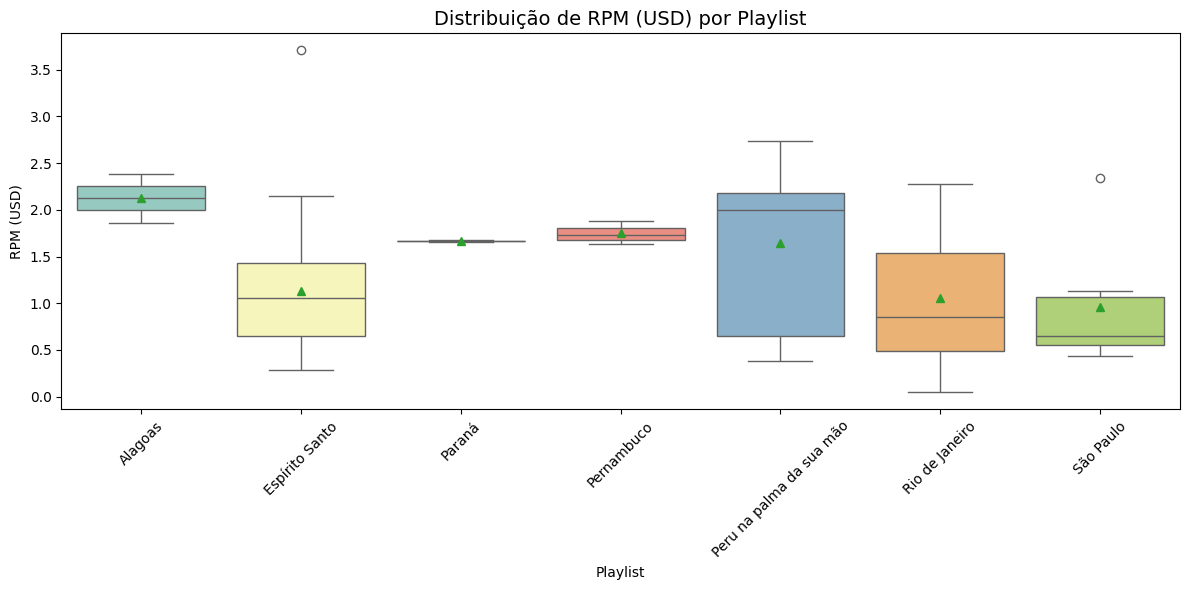

playlist  \
4                    Alagoas   
18                 S√£o Paulo   
19                Pernambuco   
21            Esp√≠rito Santo   
36            Rio de Janeiro   
72  Peru na palma da sua m√£o   

                                         content_name avg_view_duration  \
4   O que fazer em Milagres | O MELHOR da Rota Eco...           0:09:22   
18  O que fazer em ILHABELA | O melhor destino do ...           0:14:33   
19  Descubra PORTO de GALINHAS | O VILAREJO mais i...           0:09:15   
21  Descubra MARECHAL FLORIANO | Um pedacinho da E...           0:10:13   
36  Onde se HOSPEDAR na ORLA BARDOT | Roteiros de ...           0:03:34   
72  Como s√£o os FAST FOODS peruanos | Mc Donald's ...           0:05:21   

    rpm_usd  
4     2.384  
18    2.336  
19    1.885  
21    3.707  
36    2.273  
72    2.741

In [129]:
# Estat√≠sticas de RPM por Playlist
rpm_stats = (
    stg__gastronomades
    .groupby('playlist')['rpm_usd']
    .agg(['mean', 'median', 'max', 'std'])
    .reset_index()
    .sort_values(by='mean', ascending=False)
    .round(4)
)

print("Estat√≠sticas de RPM por Playlist:\n")
print(rpm_stats)

# Boxplot RPM
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=stg__gastronomades,
    x='playlist',
    y='rpm_usd',
    palette='Set3',
    showmeans=True
)
plt.title('Distribui√ß√£o de RPM (USD) por Playlist', fontsize=14)
plt.xlabel('Playlist')
plt.ylabel('RPM (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exibe v√≠deos com valores mais altos de RPM (substitua conforme seus dados)
stg__gastronomades[
    stg__gastronomades['rpm_usd'].isin([2.384,3.707,2.273,2.336,2.741,1,673,1.885,2.384])  # troque pelos maiores do seu dataset
][['playlist','content_name','avg_view_duration','rpm_usd']]


Interpreta√ß√£o: O RPM m√©dio entre v√≠deos do canal √© mais alto para a playlist de Alagoas, seguido de Pernambuco e Paran√°.

Destaques:
- O v√≠deo com maior RPM do canal √© Marechal Floriano, seguido de Milagres e Ilhabela.


                                         content_name  \
21  Descubra MARECHAL FLORIANO | Um pedacinho da E...   
72  Como s√£o os FAST FOODS peruanos | Mc Donald's ...   
44  O QUE FAZER em CUSCO e Regi√£o | Descubra os MA...   
13  O que comer em CUSCO PERU | Comida de Rua e Su...   
4   O que fazer em Milagres | O MELHOR da Rota Eco...   
18  O que fazer em ILHABELA | O melhor destino do ...   
36  Onde se HOSPEDAR na ORLA BARDOT | Roteiros de ...   
58  ONDE SE HOSPEDAR  em CUSCO Peru | Descubra um ...   
30  CONDOM√çNIO VISTA AZUL + HOSPEDAGEM EM PEDRA AZ...   
12  ONDE COMER em CUSCO PERU | Os Melhores Restaur...   

                    playlist  rpm_usd  
21            Esp√≠rito Santo    3.707  
72  Peru na palma da sua m√£o    2.741  
44  Peru na palma da sua m√£o    2.512  
13  Peru na palma da sua m√£o    2.405  
4                    Alagoas    2.384  
18                 S√£o Paulo    2.336  
36            Rio de Janeiro    2.273  
58  Peru na palma da sua m√£o    2.217  
30 

/tmp/ipython-input-130-3247018847.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


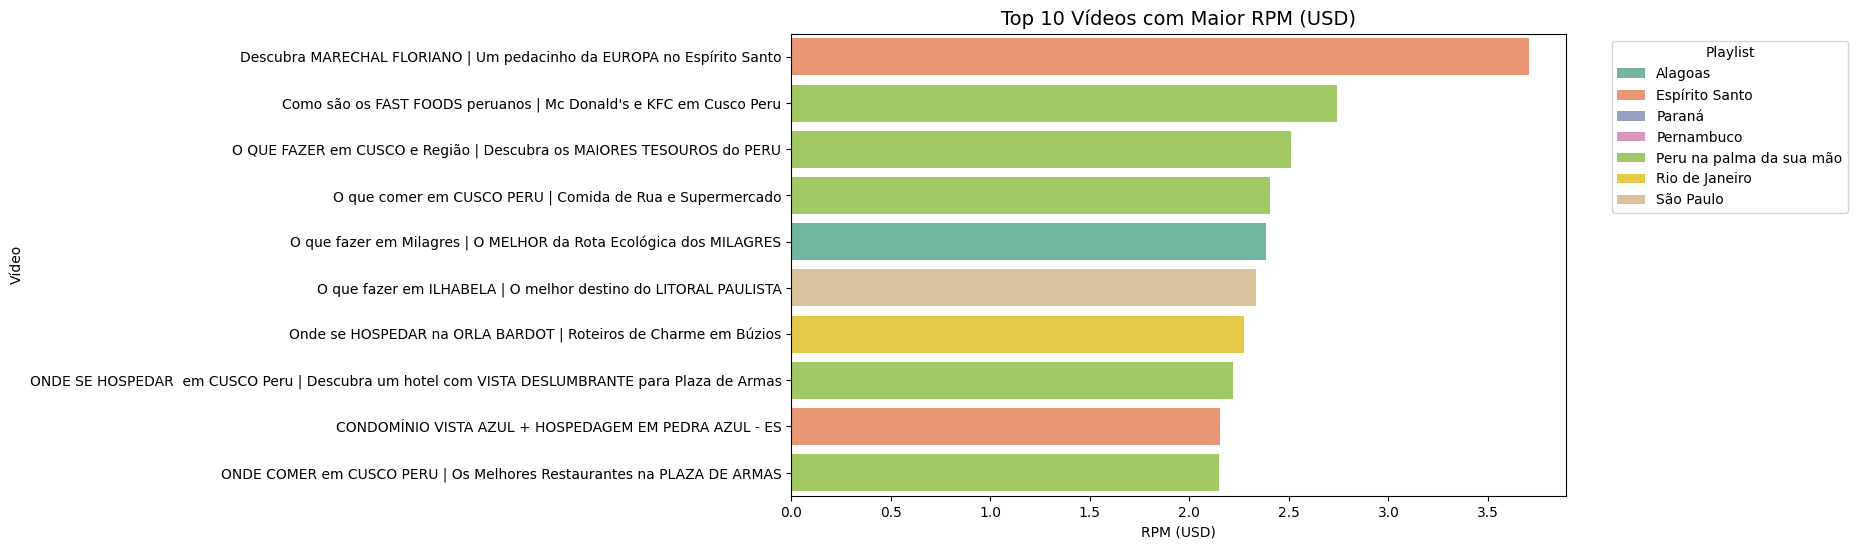

In [130]:
# Cria um dataframe com os top 10 v√≠deos com maior RPM
top_rpm_videos = (
    stg__gastronomades
    [['content_name', 'playlist', 'rpm_usd']]
    .sort_values(by='rpm_usd', ascending=False)
    .head(10)  # Mude para 5 se quiser top 5
)

# Exibe o dataframe (opcional)
print(top_rpm_videos)

# Gr√°fico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_rpm_videos,
    x='rpm_usd',
    y='content_name',
    hue='playlist',
    dodge=False,
    palette='Set2'
)

plt.title('Top 10 V√≠deos com Maior RPM (USD)', fontsize=14)
plt.xlabel('RPM (USD)')
plt.ylabel('V√≠deo')
plt.legend(title='Playlist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Interpreta√ß√£o: 5 dos 10 v√≠deos do top 10 com maior RPM s√£o do Peru, algo que n√£o tinhamos ideia. Ser√° que pode ter a ver com o fato de ser um conte√∫do estrangeiro em portugu√™s??

### Correla√ß√£o

Matriz de Correla√ß√£o:

                        watch_time__hh  duration__ss  impressions  views  \
watch_time__hh                    1.00          0.33         0.95   0.86   
duration__ss                      0.33          1.00         0.26   0.16   
impressions                       0.95          0.26         1.00   0.90   
views                             0.86          0.16         0.90   1.00   
click_through_rate_pct            0.00         -0.36        -0.01   0.22   
subscribers                       0.95          0.24         0.95   0.92   
gained_subscribers                0.95          0.24         0.95   0.93   
lost_subscribers                  0.80          0.21         0.85   0.83   
likes                             0.91          0.23         0.90   0.93   
dislikes                          0.76          0.14         0.81   0.89   
like_vs_dislike_rate             -0.16          0.02        -0.21  -0.33   
comments                          0.51          0.17         0.

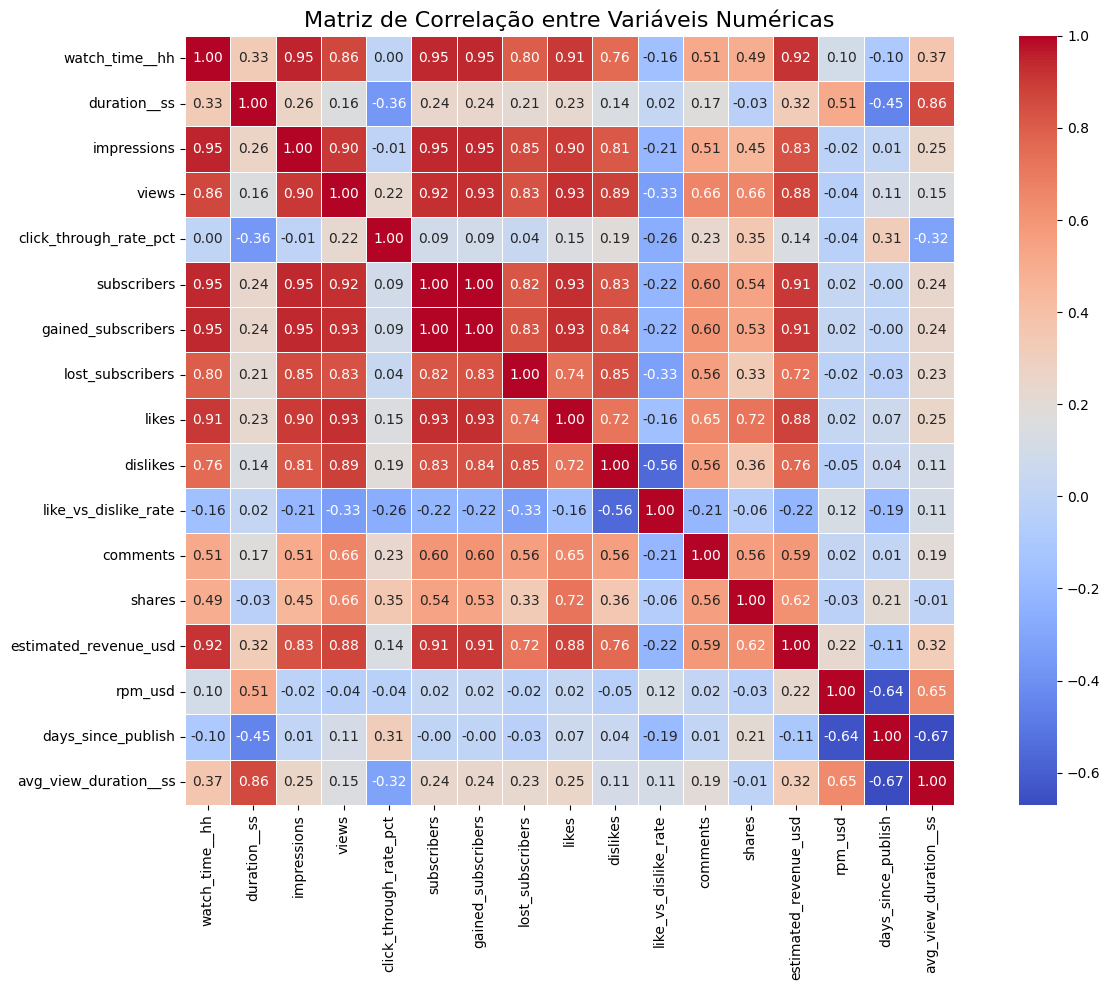

In [131]:
# Filtra apenas as colunas num√©ricas
stg__gastronomades_numeric = stg__gastronomades.select_dtypes(include=['int64', 'float64'])

# Calcula a matriz de correla√ß√£o
corr_matrix = stg__gastronomades_numeric.corr()

# Exibe a matriz de correla√ß√£o
print("Matriz de Correla√ß√£o:\n")
print(corr_matrix.round(2))

# Cria o heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,      # mostra os valores dentro das c√©lulas
    fmt=".2f",       # casas decimais
    cmap='coolwarm', # paleta de cores
    square=True,
    linewidths=0.5
)
plt.title('Matriz de Correla√ß√£o entre Vari√°veis Num√©ricas', fontsize=16)
plt.tight_layout()
plt.show()


Destaques:

- watch_time__hh: o total de horas de visualiza√ß√£o tem associa√ß√£o com praticamente todas as m√©tricas (positivo)
- duration_ss: associa√ß√£o forte com avg_view_duration__ss
- Quanto mais longo o v√≠deo, maior o tempo m√©dio de visualiza√ß√£o (0,86)
- Quanto mais impress√µes/views, mais views e horas totais de visualiza√ß√£o, consequentemente, mais engajamento (inscritos, likes, compatilhamentos) e receita estimada
- Quanto mais inscritos, maior engajamento e maior receita
- Coment√°rios tem uma associa√ß√£o mediana com likes
- A receita estimada tem associa√ß√£o com as m√©tricas de alcance e engajamento


Falta de associa√ß√£o:
- A taxa de cliques n√£o tem associa√ß√£o significativa com nenhuma vari√°vel, o que faz sentido, pois normalmente est√° associado ao t√≠tulo e √† thumb
- Coment√°rios n√£o tem associa√ß√£o significativa com nada
- RPM n√£o tem associa√ß√£o significativa com nenhuma vari√°vel

‚úÖ Conclus√£o pr√°tica
Essa leitura refor√ßa hip√≥teses de clusteriza√ß√£o:

M√©tricas de alcance, engajamento e receita podem formar agrupamentos de v√≠deos de alta performance.

A taxa de cliques e o RPM podem precisar de an√°lise separada, pois fogem do padr√£o geral.

# ML
A ideia desta se√ß√£o √© aplicar um modelo de aprendizado n√£o supervisionado para agrupar os dados de alguma forma. Inicialmente, a proposta √© classificar os v√≠deos em bons, medianos e ruins com base nas m√©tricas. Mas antes de aplicarmos alguma modelagem, vamos avaliar multicolinearidade e possibilidade de an√°lise fatorial.


## Multicolinearidade
Analisaremos aqui a possibilidade das vari√°veis estarem fortemente correlacionadas entre si.

In [133]:
import numpy as np
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleciona colunas num√©ricas
X = stg__gastronomades.select_dtypes(include=['int64', 'float64'])

# Remove linhas com NaN ou Inf
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Adiciona constante
X = add_constant(X)

# Calcula VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Ordena do maior para o menor
vif_data.sort_values(by='VIF', ascending=False)


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


feature          VIF
8         lost_subscribers          inf
7       gained_subscribers          inf
6              subscribers          inf
0                    const  4862.141543
1           watch_time__hh    67.778097
4                    views    60.166058
3              impressions    53.121637
14   estimated_revenue_usd    34.356085
9                    likes    32.966751
10                dislikes    19.247298
17   avg_view_duration__ss    12.527076
2             duration__ss     9.185631
13                  shares     6.746009
15                 rpm_usd     3.435350
16      days_since_publish     3.059451
12                comments     2.496171
11    like_vs_dislike_rate     2.454591
5   click_through_rate_pct     1.910624

Interpreta√ß√£o: O resultado mostra que algumas vari√°veis apresentam alta multicolinearidade, ou seja, est√£o muito correlacionadas entre si, o que pode prejudicar a an√°lise e o desempenho do modelo.

Por outro lado, h√° um grupo de vari√°veis que apresentam valores baixos de VIF, indicando que s√£o menos correlacionadas e trazem informa√ß√µes mais independentes para a an√°lise.
<br> </br>
Vari√°veis com VIF aceit√°vel (menor que ~5):
- rpm_usd: VIF ‚âà 3.44
- days_since_publish: VIF ‚âà 3.06
- comments: VIF ‚âà 2.50
- like_vs_dislike_rate: VIF ‚âà 2.45
- click_through_rate_pct: VIF ‚âà 1.91

## Normaliza√ß√£o/Padroniza√ß√£o
Como os dados est√£o muito correlacionados, optamos por normaliza√ß√£o para que ambos fiquem na mesma escala, com m√©dia 0 e vari√¢ncia 1. A ideia √© eliminar um poss√≠vel vi√©s nas etapas futuras que faremos.

In [134]:
from sklearn.preprocessing import StandardScaler

# Seleciona as colunas num√©ricas do dataframe original e remove linhas com missing
X_num = stg__gastronomades_numeric.dropna()

# Inicializa o scaler
scaler = StandardScaler()

# Aplica padroniza√ß√£o (m√©dia 0, vari√¢ncia 1)
X_num_scaled = scaler.fit_transform(X_num)

# Cria um dataframe novo, mantendo os nomes das colunas
stg__gastronomades_scaled = pd.DataFrame(X_num_scaled, columns=numeric_columns, index=X_num.index)

# Visualiza as primeiras linhas do dataframe padronizado
stg__gastronomades_scaled.head()


watch_time__hh  duration__ss  impressions     views  \
0        7.524825      2.257998     7.165860  5.442927   
1        2.725226      2.115289     1.492225  1.492682   
2        1.779992      1.041314     3.279702  2.462225   
3        1.174742     -0.100357     0.256290  1.972783   
4        1.170849      1.553602     0.678305  0.682346   

   click_through_rate_pct  subscribers  gained_subscribers  lost_subscribers  \
0               -0.930428     7.282464            7.273347          5.617402   
1               -0.298791     0.970020            1.003193          2.157253   
2               -0.751999     1.680978            1.720989          3.022290   
3                0.900249     1.207006            1.193198          0.427179   
4               -0.259536     1.314727            1.277645         -0.437858   

      likes  dislikes  like_vs_dislike_rate  comments    shares  \
0  5.913892  5.455655             -0.692372  1.939436  2.150959   
1  1.540190  0.977653             -0.291155  1.939436  0.245984   
2  2.027090  2.391759             -0.881958  0.846986  0.323512   
3  2.102643  0.977653             -0.105979  2.157926  5.606496   
4  1.128844  0.034916              0.264375  1.502456  0.268135   

   estimated_revenue_usd   rpm_usd  days_since_publish  avg_view_duration__ss  
0               6.713517  0.557426           -1.130012               1.948410  
1               2.300097  0.846391           -1.478752               2.444414  
2              -0.454219 -1.699588            1.583266               0.282815  
3               2.389111  0.418554            0.172975               0.007257  
4               1.713987  1.575818           -1.398274               1.703469

## Redu√ß√£o de dimensionalidade
Utilizaremos a t√©cnica de An√°lise de Componentes Principais (PCA) para reduzir o n√∫mero de vari√°veis a serem utilizadas futuramente em um modelo. Essa √© uma abordagem que visa solucionar o problema de multicolinearidade dos dados visto anteriormente.

Vari√¢ncia explicada por cada componente:
 [5.30444486e-01 1.92329418e-01 7.30524719e-02 6.72133995e-02
 3.77679626e-02 2.64140916e-02 2.39303917e-02 1.50998444e-02
 1.21187333e-02 6.63876043e-03 5.20416003e-03 3.52325151e-03
 3.09154480e-03 1.56541317e-03 1.26579822e-03 3.40273192e-04
 3.21845952e-34]

Vari√¢ncia explicada acumulada:
 [0.53044449 0.7227739  0.79582638 0.86303978 0.90080774 0.92722183
 0.95115222 0.96625207 0.9783708  0.98500956 0.99021372 0.99373697
 0.99682852 0.99839393 0.99965973 1.         1.        ]


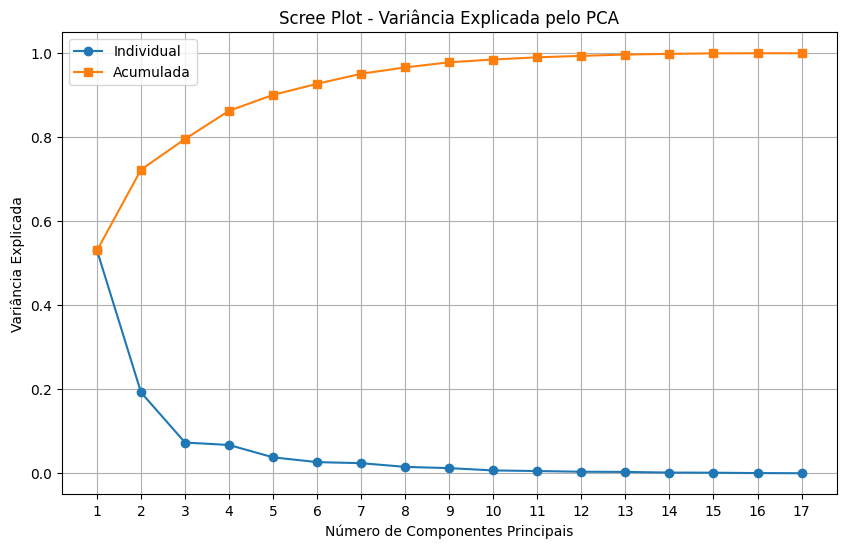

In [135]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1Ô∏è‚É£ Inicializa o PCA: aqui n√£o limitamos o n√∫mero de componentes para ver tudo
pca = PCA()
X_pca = pca.fit_transform(stg__gastronomades_scaled)

# 2Ô∏è‚É£ Vari√¢ncia explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print("Vari√¢ncia explicada por cada componente:\n", explained_variance_ratio)

# 3Ô∏è‚É£ Vari√¢ncia acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nVari√¢ncia explicada acumulada:\n", cumulative_variance)

# 4Ô∏è‚É£ Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', label='Acumulada')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.title('Scree Plot - Vari√¢ncia Explicada pelo PCA')
plt.xlabel('N√∫mero de Componentes Principais')
plt.ylabel('Vari√¢ncia Explicada')
plt.legend()
plt.grid(True)
plt.show()


Interpreta√ß√£o: Como h√° muitas vari√°veis no conjunto de dados e muitas delas est√£o altamente correlacionadas, entendemos que seria vi√°vel aplicar um m√©todo de redu√ß√£o de dimensionalidade, a fim de "resumir" o conjunto de dados.
<br> </br>
Aplicamos a an√°lise de componentes principais e observamos que com 4 componentes principais conseguimos explicar mais de 86%. Por√©m, antes de seguirmos os pr√≥ximos passos, precisamos entender quais vari√°veis do conjunto de dados ajudam mais a construir cada componente.


In [136]:
# Cada linha √© um componente principal
# Cada coluna √© uma vari√°vel original
loadings = pca.components_

print(loadings.shape)  # Confirma formato (n_components, n_features)

# Cria DataFrame com os nomes das vari√°veis
loadings_df = pd.DataFrame(
    loadings,
    columns=numeric_columns  # Suas vari√°veis originais
)

# Indexa como PC1, PC2, PC3...
loadings_df.index = [f'PC{i+1}' for i in range(loadings_df.shape[0])]


#visualiza
loadings_df.head(4)



(17, 17)


watch_time__hh  duration__ss  impressions     views  \
PC1        0.314925      0.121460     0.313451  0.321053   
PC2        0.063311      0.452800     0.001876 -0.096139   
PC3       -0.068483     -0.039396    -0.181704  0.017805   
PC4        0.133544     -0.054322     0.136789 -0.008791   

     click_through_rate_pct  subscribers  gained_subscribers  \
PC1                0.038058     0.323545            0.324048   
PC2               -0.297816    -0.013351           -0.013373   
PC3                0.497648    -0.054853           -0.059914   
PC4               -0.412018     0.097114            0.093443   

     lost_subscribers     likes  dislikes  like_vs_dislike_rate  comments  \
PC1          0.286784  0.315957  0.288653             -0.097441  0.226189   
PC2         -0.011893 -0.032296 -0.092467              0.180279 -0.045295   
PC3         -0.252502  0.127776 -0.226933              0.280955  0.251858   
PC4         -0.070523  0.167952 -0.275233              0.709465 -0.095976   

       shares  estimated_revenue_usd   rpm_usd  days_since_publish  \
PC1  0.200150               0.309844  0.024666           -0.004519   
PC2 -0.154968               0.036832  0.400463           -0.472047   
PC3  0.526807               0.135365  0.361958           -0.018745   
PC4  0.172717              -0.006088 -0.305317            0.145443   

     avg_view_duration__ss  
PC1               0.104228  
PC2               0.489702  
PC3               0.070760  
PC4              -0.082334

**PC1:**<br>
- watch_time__hh (0.31)
- impressions (0.31)
- views (0.32)
- subscribers (0.32)
- gained_subscribers (0.32)
- likes (0.31)
- estimated_revenue_usd (0.31)
- outros: lost_subscribers (0.29), dislikes (0.29)
<br><br>

Interpreta√ß√£o: O PC1 tem pesos fortes e consistentes em alcance, engajamento geral e receita estimada. √â um componente de performance geral ‚Üí quanto maior, mais bem-sucedido √© o v√≠deo em tudo.
<br><br>

**PC2:**<br>
- duration__ss (0.45)
- avg_view_duration__ss (0.49)
- rpm_usd (0.40)
- days_since_publish (-0.47)
- click_through_rate_pct (-0.30)
<br><br>

Interpreta√ß√£o: O PC2 separa v√≠deos longos e com alta reten√ß√£o m√©dia. O RPM tamb√©m pesa positivamente ‚Üí indica v√≠deos de conte√∫do mais longo que ret√™m p√∫blico e s√£o mais rent√°veis por mil views, mas n√£o necessariamente com alto alcance. A rela√ß√£o negativa com days_since_publish sugere que v√≠deos mais recentes tendem a ter essas caracter√≠sticas, o que reflete as melhorias realizadas nos √∫ltimos v√≠deos do canal.
<br><br>

**PC3:**<br>
- shares (0.53)
- click_through_rate_pct (0.50)
- like_vs_dislike_rate (0.28)
- comments (0.25)
- rpm_usd (0.36)
- impressions (-0.18)
- lost_subscribers (-0.25)
- dislikes (-0.22)
<br><br>

Interpreta√ß√£o: O PC3 destaca m√©tricas de engajamento ativo ‚Üí compartilhamentos, CTR, coment√°rios, qualidade de likes vs dislikes. √â um sinal de v√≠deos que geram intera√ß√£o espont√¢nea e s√£o bem recebidos pelo p√∫blico ‚Üí podem ter alto engajamento relativo, mesmo sem ter grande alcance.
<br><br>

**PC4:**<br>
- like_vs_dislike_rate (0.71)
- click_through_rate_pct (-0.41)
- dislikes (-0.27)
- rpm_usd (-0.31)
<br><br>

Interpreta√ß√£o: O PC4  parece ser um fator qualitativo:

- like_vs_dislike_rate muito forte positivo indica v√≠deos com √≥tima aceita√ß√£o relativa.
- click_through_rate_pct negativo mostra que mesmo v√≠deos pouco clicados podem ser bem avaliados por quem clica.
- rpm_usd negativo sugere que v√≠deos bem avaliados n√£o necessariamente t√™m alta receita por mil views.
<br><br>

Portanto, o resumo das componentes √©:

- PC1: Performance Geral ‚Äî alcance, engajamento e receita se movem juntos (Alcance & Receita)
- PC2: Conte√∫do Longo de Reten√ß√£o Alta ‚Äî v√≠deos longos, com boa reten√ß√£o e RPM	(Reten√ß√£o & Qualidade)
- PC3	Engajamento Ativo ‚Äî v√≠deos que as pessoas comentam, compartilham e t√™m boa CTR	(Engajamento Qualitativo)
- PC4: Rea√ß√£o Positiva Relativa ‚Äî v√≠deos com √≥tima taxa de likes, poucos dislikes, mas RPM e CTR menores (Aceita√ß√£o & Sentimento)
<br><br>

A partir disso, podemos ter as seguintes estrat√©gias de conte√∫do:
<br>

**PC1**
- Alto: Tudo performa bem (alcance + receita + engajamento)
- Baixo:  indica v√≠deos com baixo alcance e baixo engajamento e receita. V√≠deo com pouco valor geral. A√ß√£o: Evitar repetir formatos/temas que n√£o performam bem em NENHUMA dimens√£o. Tentar analisar o que eles t√™m em comum: tema n√£o relevante? falta de otimiza√ß√£o SEO? hor√°rio ruim? Dica: Usar esses v√≠deos como benchmark negativo, serve pra aprender o que N√ÉO priorizar.

<br>

**PC2**
- Alto: Longo com reten√ß√£o alta, monetiza bem
- Baixo: 	Indica v√≠deos longos mas com baixa reten√ß√£o m√©dia, ou v√≠deos curtos que n√£o engajam. Roteiro ruim, abandona cedo. Se o v√≠deo √© longo mas ningu√©m assiste at√© o fim, vale revisar roteiro, din√¢mica, cortes. Talvez dividir em partes menores. Se √© curto e ainda assim tem baixa reten√ß√£o, pode ser problema de gancho inicial. Dica: Ver pontos de abandono no YouTube Analytics.

<br>

**PC3**
- Alto: Gera discuss√£o, compartilhamento
- Baixo: Indica  poucos coment√°rios, compartilhamentos e CTR fraco. P√∫blico passivo, engaja pouco. Refor√ßar chamadas √† a√ß√£o, incentivar coment√°rios e compartilhamentos. Revise se o conte√∫do gera emo√ß√£o ou discuss√£o. Pode ser conte√∫do mais ‚Äúneutro‚Äù, informativo demais, sem pergunta provocativa. Dica: Usar prompts diretos: ‚ÄúVoc√™ j√° passou por isso? Comente!‚Äù ou ‚ÄúCompartilhe com quem vai amar isso!‚Äù.

<br>

**PC4**
- Alto: Aceito e bem avaliado
- Baixo: Indica mais dislikes, baixa rela√ß√£o like/dislike, CTR desalinhado.. Mais rejei√ß√£o, cr√≠tica, expectativa n√£o entregue. Verificar coment√°rios negativos, poss√≠veis pol√™micas ou expectativas n√£o atendidas. T√≠tulo e thumb podem gerar cliques ‚Äúenganados‚Äù, gerando dislikes. Dica: comparar v√≠deos de PC4 alto e baixo para ver quais promessas est√£o sendo mal entregues.


In [137]:
# Constr√≥i o dataframe com as componentes
pcs_df = pd.DataFrame(
    X_pca[:, :4],
    columns=[
        'pc1__Overall_Performance',
        'pc2__Retention_and_Quality',
        'pc3__Active_Engagement',
        'pc4__Audience_Sentiment'
    ]
)

pcs_df['content_id'] = stg__gastronomades.loc[X_num.index, 'content_id'].values
pcs_df['content_name'] = stg__gastronomades.loc[X_num.index, 'content_name'].values
pcs_df['playlist'] = stg__gastronomades.loc[X_num.index, 'playlist'].values

# Reorganiza colunas
cols = ['content_id', 'content_name', 'playlist'] + list(pcs_df.columns[:-3])
pcs_df = pcs_df[cols]

pcs_df.head(5)


content_id                                       content_name  \
0  ZCFX5pQDs50  O melhor da GASTRONOMIA CURITIBANA | Onde COME...   
1  R5zvHCL4uv4  Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...   
2  xKyysw_ic0c      ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS   
3  3AQPokDhg_A  Conhe√ßa as MONTANHAS de GUARAPARI | O MELHOR d...   
4  o6d3z2KSCjk  O que fazer em Milagres | O MELHOR da Rota Eco...   

         playlist  pc1__Overall_Performance  pc2__Retention_and_Quality  \
0          Paran√°                 19.608379                    1.721382   
1         Alagoas                  5.588484                    3.026738   
2  Rio de Janeiro                  5.958046                   -1.344164   
3  Esp√≠rito Santo                  5.323076                   -1.431978   
4         Alagoas                  3.181356                    2.847933   

   pc3__Active_Engagement  pc4__Audience_Sentiment  
0               -2.311862                 1.838657  
1                0.008329                -0.450433  
2               -2.881835                 0.788576  
3                4.100738                 0.660038  
4                1.259641                -0.021894

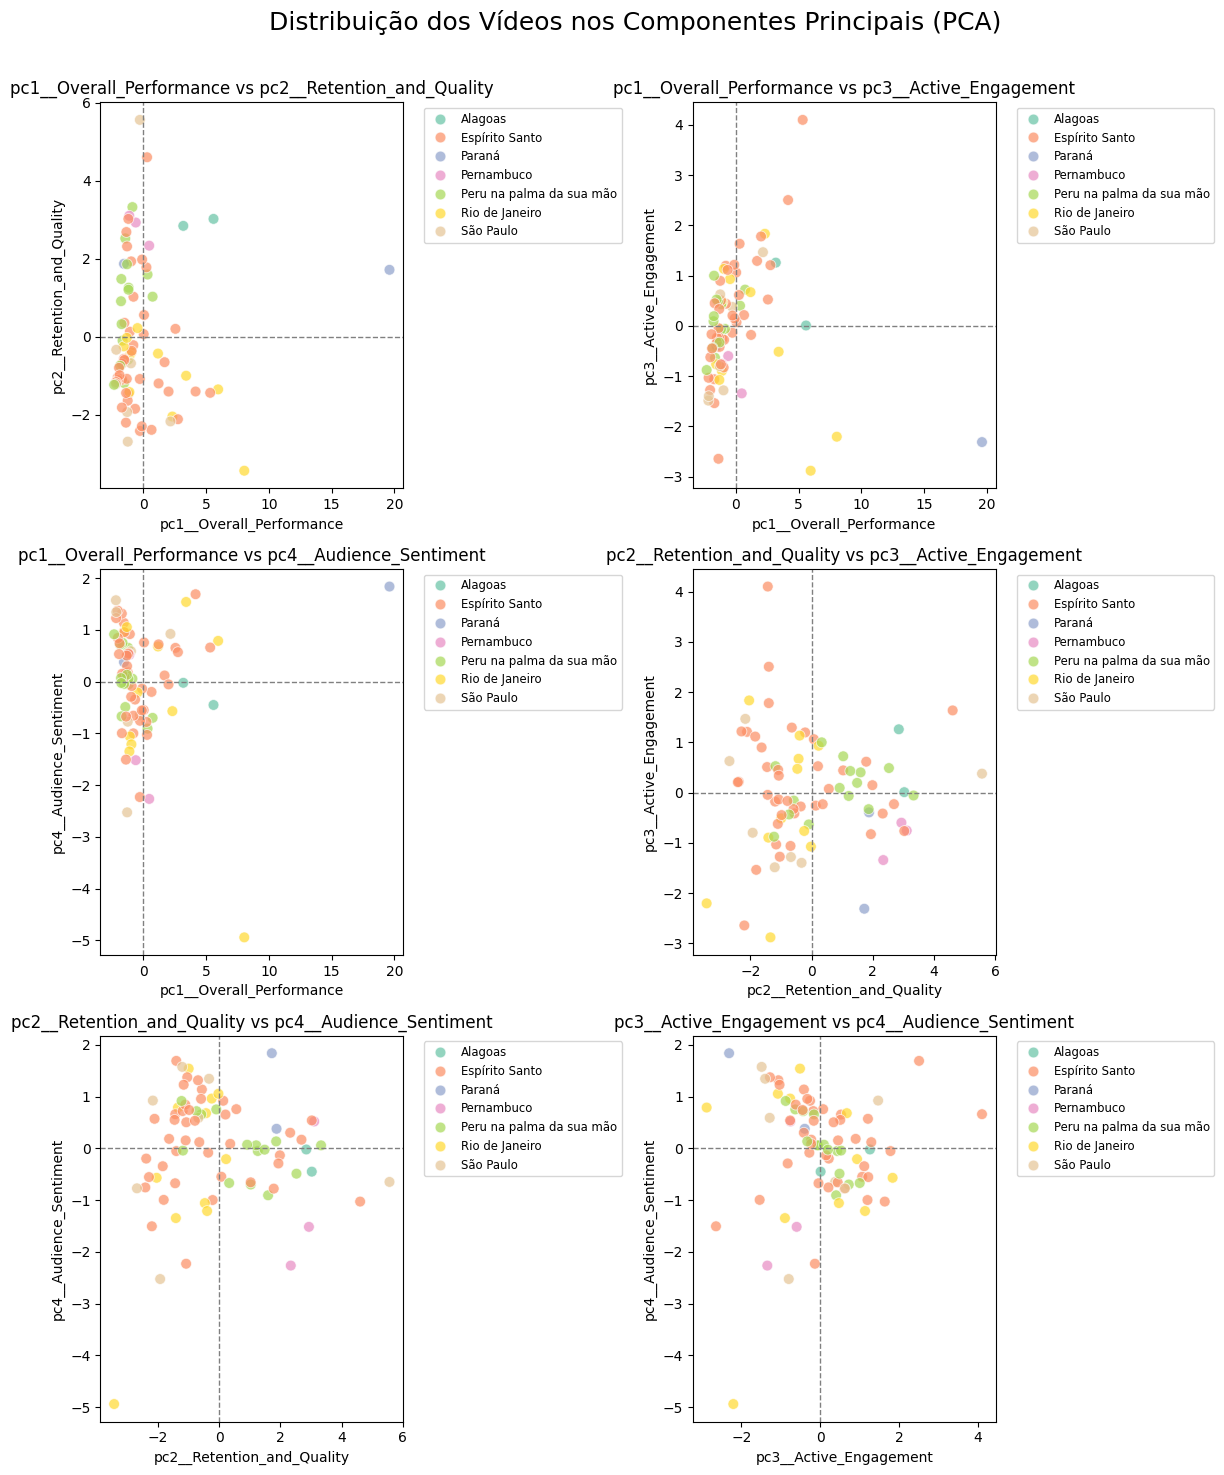

In [138]:
# Para ter cores diferentes por playlist:
hue_col = 'playlist'

# Cria figura 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()  # Para acessar como lista

# Combina√ß√µes de pares sugeridas
pairs = [
    ('pc1__Overall_Performance', 'pc2__Retention_and_Quality'),
    ('pc1__Overall_Performance', 'pc3__Active_Engagement'),
    ('pc1__Overall_Performance', 'pc4__Audience_Sentiment'),
    ('pc2__Retention_and_Quality', 'pc3__Active_Engagement'),
    ('pc2__Retention_and_Quality', 'pc4__Audience_Sentiment'),
    ('pc3__Active_Engagement', 'pc4__Audience_Sentiment')
]

# Plota cada par
for ax, (x_pc, y_pc) in zip(axes, pairs):
    sns.scatterplot(
        data=pcs_df,
        x=x_pc,
        y=y_pc,
        hue=hue_col,
        palette='Set2',
        ax=ax,
        alpha=0.7,
        s=60
    )
    ax.set_title(f'{x_pc} vs {y_pc}')
    ax.axhline(0, ls='--', lw=1, c='gray')
    ax.axvline(0, ls='--', lw=1, c='gray')

    # Ajusta a legenda: menor e para fora do gr√°fico
    ax.legend(
        fontsize='small',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

# Ajusta layout geral
plt.suptitle('Distribui√ß√£o dos V√≠deos nos Componentes Principais (PCA)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Interpreta√ß√£o: na combina√ß√£o de todas as componentes 2x2 os gr√°ficos evidenciam a maioria das playlists que se destacaram nas an√°lises anteriores, mas tamb√©m algumas outras surpresas que pudemos constatar no quadrante superior direito em cada gr√°fico.
<br><br>

**PC1 vs PC2**
- (+) Os v√≠deos provavelmente t√™m grande alcance, muitos inscritos, alta receita estimada, e o p√∫blico assiste uma boa parte do v√≠deo (alta reten√ß√£o). Conte√∫do possivelmente recente e bem otimizado, com bons thumbnails/t√≠tulos (RPM alto).
- (-) Pouco alcance, poucos inscritos, baixa receita e engajamento, e o p√∫blico n√£o assiste muito tempo desses v√≠deos. Conte√∫do possivelmente antigo, com menor apelo, thumbnails/t√≠tulos menos atrativos.
<br> <br>

**PC1 vs PC3**
- (+) V√≠deos com alta performance geral e alto engajamento ativo do p√∫blico. Al√©m de ter bom alcance e receita, esses v√≠deos geram bastante intera√ß√£o real (coment√°rios, compartilhamentos, cliques). Conte√∫dos virais ou muito apreciados pela comunidade.
- (-) V√≠deos com baixo desempenho geral e pouco engajamento. Pouco alcance, poucas intera√ß√µes, baixo impacto geral.
<br> <br>

**PC1 vs PC4**
- (+) V√≠deos com alta performance e audi√™ncia satisfeita (alta taxa de likes relativos a dislikes). Conte√∫do de qualidade e bem recebido, alto alcance e engajamento positivo.
- (-) V√≠deos com baixa performance e baixo sentimento da audi√™ncia (mais dislikes, menos likes). Pode indicar conte√∫dos que geram rejei√ß√£o ou pol√™micas, al√©m de pouca visualiza√ß√£o.
<br> <br>

**PC2 vs PC3**
- (+) V√≠deos que prendem a aten√ß√£o do p√∫blico e geram muito engajamento ativo. S√£o v√≠deos de alta qualidade, que o p√∫blico assiste bastante e interage bastante (coment√°rios, compartilhamentos).
- (-) V√≠deos com baixa reten√ß√£o e baixo engajamento. Conte√∫dos que n√£o engajam nem ret√™m, podem precisar de revis√£o.
<br> <br>

**PC2 vs PC4**
- (+) V√≠deos que mant√™m o p√∫blico engajado e ret√™m a aten√ß√£o e s√£o bem avaliados pela audi√™ncia. Conte√∫do com boa qualidade t√©cnica e emocional.
- (-) V√≠deos que t√™m baixa reten√ß√£o e s√£o mal recebidos (mais dislikes). Conte√∫dos possivelmente problem√°ticos ou pouco interessantes.
<br> <br>

**PC3 vs PC4**
- (+) V√≠deos que geram muita intera√ß√£o positiva e t√™m uma audi√™ncia satisfeita.
Conte√∫dos que engajam e conquistam o p√∫blico.
- (-) √≠deos com pouco engajamento e audi√™ncia negativa. Menor potencial viral e pior aceita√ß√£o.

In [139]:
# Cria um novo dataframe para armazenar os flags das PCs em high e low
pcs_flags_df = pcs_df.copy()

# Para cada PC, cria flag
pcs_flags_df['pc1_flag'] = np.where(pcs_flags_df['pc1__Overall_Performance'] > 0, 'High', 'Low')
pcs_flags_df['pc2_flag'] = np.where(pcs_flags_df['pc2__Retention_and_Quality'] > 0, 'High', 'Low')
pcs_flags_df['pc3_flag'] = np.where(pcs_flags_df['pc3__Active_Engagement'] > 0, 'High', 'Low')
pcs_flags_df['pc4_flag'] = np.where(pcs_flags_df['pc4__Audience_Sentiment'] > 0, 'High', 'Low')

# Organiza as colunas
cols = [
    'content_id', 'content_name', 'playlist',
    'pc1__Overall_Performance', 'pc1_flag',
    'pc2__Retention_and_Quality', 'pc2_flag',
    'pc3__Active_Engagement', 'pc3_flag',
    'pc4__Audience_Sentiment', 'pc4_flag'
]
pcs_flags_df = pcs_flags_df[cols]

# 4Ô∏è‚É£ Visualiza
pcs_flags_df.head(10)


content_id                                       content_name  \
0  ZCFX5pQDs50  O melhor da GASTRONOMIA CURITIBANA | Onde COME...   
1  R5zvHCL4uv4  Roteiro de 3 dias em MARAGOGI no ALAGOAS | Car...   
2  xKyysw_ic0c      ARRAIAL DO CABO - ROTEIRO COMPLETO DE 02 DIAS   
3  3AQPokDhg_A  Conhe√ßa as MONTANHAS de GUARAPARI | O MELHOR d...   
4  o6d3z2KSCjk  O que fazer em Milagres | O MELHOR da Rota Eco...   
5  HmfwzdxYS5c  O que fazer em SANTA TERESA | O MELHOR do Circ...   
6  JBeFwPHoij8             POUSADA VISTA TURQUESA ARRAIAL DO CABO   
7  vaXN_VANKN0     VISITAMOS A MENOR PRAIA DE NUDISMO DO BRASIL üò±   
8  w3QplOzNLqs  O que fazer nas MONTANHAS CAPIXABAS | Roteiro ...   
9  cgDTwbcaBB0  O que fazer em Arraial do Cabo | Quadriciclo n...   

         playlist  pc1__Overall_Performance pc1_flag  \
0          Paran√°                 19.608379     High   
1         Alagoas                  5.588484     High   
2  Rio de Janeiro                  5.958046     High   
3  Esp√≠rito Santo                  5.323076     High   
4         Alagoas                  3.181356     High   
5  Esp√≠rito Santo                  4.159255     High   
6  Rio de Janeiro                  3.406483     High   
7  Rio de Janeiro                  8.040409     High   
8  Esp√≠rito Santo                  2.554487     High   
9  Rio de Janeiro                  2.311147     High   

   pc2__Retention_and_Quality pc2_flag  pc3__Active_Engagement pc3_flag  \
0                    1.721382     High               -2.311862      Low   
1                    3.026738     High                0.008329     High   
2                   -1.344164      Low               -2.881835      Low   
3                   -1.431978      Low                4.100738     High   
4                    2.847933     High                1.259641     High   
5                   -1.398430      Low                2.505193     High   
6                   -0.994084      Low               -0.514013      Low   
7                   -3.428829      Low               -2.205045      Low   
8                    0.207824     High                0.525239     High   
9                   -2.040247      Low                1.834045     High   

   pc4__Audience_Sentiment pc4_flag  
0                 1.838657     High  
1                -0.450433      Low  
2                 0.788576     High  
3                 0.660038     High  
4                -0.021894      Low  
5                 1.690348     High  
6                 1.541051     High  
7                -4.942175      Low  
8                 0.653378     High  
9                -0.569342      Low

In [140]:
#Consulta PCs pelo flag
filtered = pcs_flags_df[
    (pcs_flags_df['pc1_flag'] == 'Low') &
    (pcs_flags_df['pc4_flag'] == 'Low')
]

filtered[['content_id', 'content_name', 'playlist']]

content_id                                       content_name  \
18  221JVBRQNU0  O que fazer em ILHABELA | O melhor destino do ...   
25  n41pSaGHWow  Praia dos Carneiros | A PRAIA MAIS BONITA do B...   
26  IdS17O6T7kg  O QUE FAZER em Alfredo Chaves | Descubra a TER...   
28  hSTwFxGrlS0  Onde se HOSPEDAR em Pedra Azul | O MELHOR hote...   
29  5rVkH1dhYPo  CONDOM√çNIO VISTA AZUL + HOSPEDAGEM EM PEDRA AZ...   
31  Qp5hDT1lM3o  POUSADA SENTINELAS DO MAR EM ARRAIAL DO CABO - RJ   
32  0aYDaSOwsGk  Descubra a CACHOEIRA de MATILDE em Alfredo Cha...   
33  Kl9arTZCtKM  O que fazer na Praia de CAMBURI | O ponto tur√≠...   
34  n6rHFlTb6OY                         GRECO HOTEL EM B√öZIOS - RJ   
35  H5km-VuXwYc  Onde se HOSPEDAR na ORLA BARDOT | Roteiros de ...   
36  rXIkjq6Unqw  O que fazer no VALE SAGRADO PERU? | Descubra o...   
37  403nJWCV3Y4               UM DIA DE INVERNO EM PEDRA AZUL - ES   
41  HIcqLSvwuqM  Descubra o bar do GALO | Bar TEM√ÅTICO do Atl√©t...   
43  Qf8Y6snS2eg  O QUE FAZER em CUSCO e Regi√£o | Descubra os MA...   
46  vAkRSNTZrHc      CAL√áAD√ÉO URBAN√ìIDE NA RUA AUGUSTA - S√ÉO PAULO   
48  IFLlnOrERa4  BRILHO DE NATAL DE DOMINGOS MARTINS NO ESPIRIT...   
49  QES3KmLoeHE  Descubra a ORLA BARDOT em B√∫zios | Homenagem a...   
50  pGZ3r0-EbHo  Roteiro de 1 DIA na ROTA DA FERRADURA | Descub...   
51  FgRVAUevnag  Descubra onde se HOSPEDAR em Cusco PERU | Hote...   
57  xxwndaGYhOQ  ONDE SE HOSPEDAR  em CUSCO Peru | Descubra um ...   
58  OSNVdg9Dtco                   ALAS RESTAURANTE EM VIT√ìRIA - ES   
62  2wOABvH_RUI  ATHENAS CAF√â E RESTAURANTE - RUA AUGUSTA - S√ÉO...   
68  QiwcZ1V39ek              CAF√â KOEHLER EM DOMINGOS MARTINS - ES   
70  sWKh-vP50xQ  Como s√£o os FAST FOODS peruanos | Mc Donald's ...   
76  29DsPXXPwnE           PRA√áA AUGUSTO RUSCHI - SANTA TERESA - ES   

                    playlist  
18                 S√£o Paulo  
25                Pernambuco  
26            Esp√≠rito Santo  
28            Esp√≠rito Santo  
29            Esp√≠rito Santo  
31            Rio de Janeiro  
32            Esp√≠rito Santo  
33            Esp√≠rito Santo  
34            Rio de Janeiro  
35            Rio de Janeiro  
36  Peru na palma da sua m√£o  
37            Esp√≠rito Santo  
41            Esp√≠rito Santo  
43  Peru na palma da sua m√£o  
46                 S√£o Paulo  
48            Esp√≠rito Santo  
49            Rio de Janeiro  
50            Esp√≠rito Santo  
51  Peru na palma da sua m√£o  
57  Peru na palma da sua m√£o  
58            Esp√≠rito Santo  
62                 S√£o Paulo  
68            Esp√≠rito Santo  
70  Peru na palma da sua m√£o  
76            Esp√≠rito Santo

## Clusteriza√ß√£o
Utilizaremos uma t√©cnica de agrupamento para tentar classificar os v√≠deos em grupos.

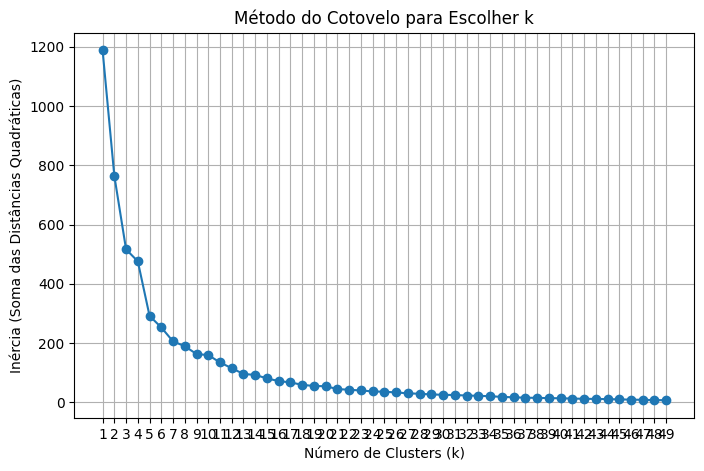

In [141]:
from sklearn.cluster import KMeans

# Vamos usar o dataframe das componentes principais
X_pca = pcs_df[[
    'pc1__Overall_Performance',
    'pc2__Retention_and_Quality',
    'pc3__Active_Engagement',
    'pc4__Audience_Sentiment'
]]

# Lista para guardar as distor√ß√µes
inertia = []

# Testa k de 1 a 50
K_range = range(1, 50)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Gr√°fico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('In√©rcia (Soma das Dist√¢ncias Quadr√°ticas)')
plt.title('M√©todo do Cotovelo para Escolher k')
plt.xticks(K_range)
plt.grid(True)
plt.show()


In [142]:
#Ajusta o kmeans

k_optimal = 5  #k sugerido pelo Elbow Method

# Instancia e treina
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42)
pcs_df['cluster'] = kmeans_final.fit_predict(X_pca)

# Ver quantos v√≠deos em cada cluster
print("\nDistribui√ß√£o de v√≠deos por cluster:")
print(pcs_df['cluster'].value_counts())



Distribui√ß√£o de v√≠deos por cluster:
cluster
3    42
0    23
4    14
2     1
1     1
Name: count, dtype: int64


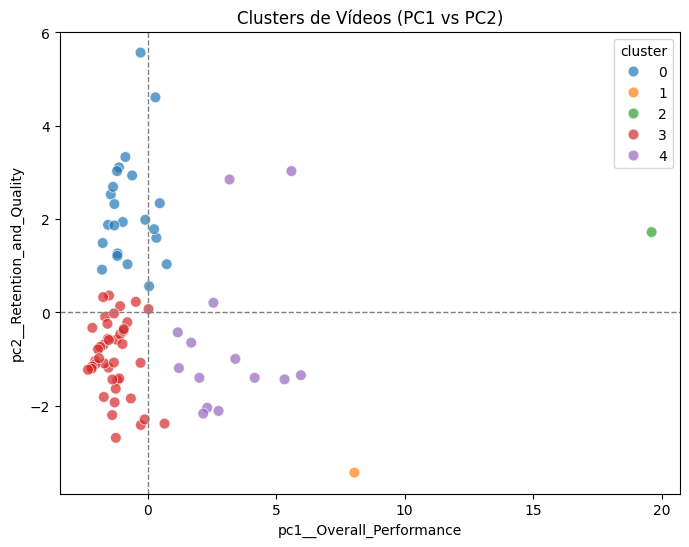

In [143]:
# Par exemplo: PC1 vs PC2 colorindo por cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pcs_df,
    x='pc1__Overall_Performance',
    y='pc2__Retention_and_Quality',
    hue='cluster',
    palette='tab10',
    alpha=0.7,
    s=60
)
plt.axhline(0, ls='--', lw=1, c='gray')
plt.axvline(0, ls='--', lw=1, c='gray')
plt.title('Clusters de V√≠deos (PC1 vs PC2)')
plt.show()


In [144]:
pcs_df[pcs_df['cluster'] == 2]

content_id                                       content_name playlist  \
0  ZCFX5pQDs50  O melhor da GASTRONOMIA CURITIBANA | Onde COME...   Paran√°   

   pc1__Overall_Performance  pc2__Retention_and_Quality  \
0                 19.608379                    1.721382   

   pc3__Active_Engagement  pc4__Audience_Sentiment  cluster  
0               -2.311862                 1.838657        2

Interpreta√ß√£o: Ao escolher 5 grupos, que foi o ponto onde a curva come√ßou a se estabilizar, o algoritmo cria 2 dos 5 grupos com v√≠deos isolados do canal, s√£o eles:

- Nudismo: j√° alteramos a visualiza√ß√£o dele para privada
- Gastronomia Curitibana: o melhor v√≠deo do canal

<br>
Parece que nesta abordagem com 5 grupos esses dis v√≠deos s√£o vistos como outliers. Talvez seja interessante remover esses 2 v√≠deos do conjunto de dados e refazer tudo.

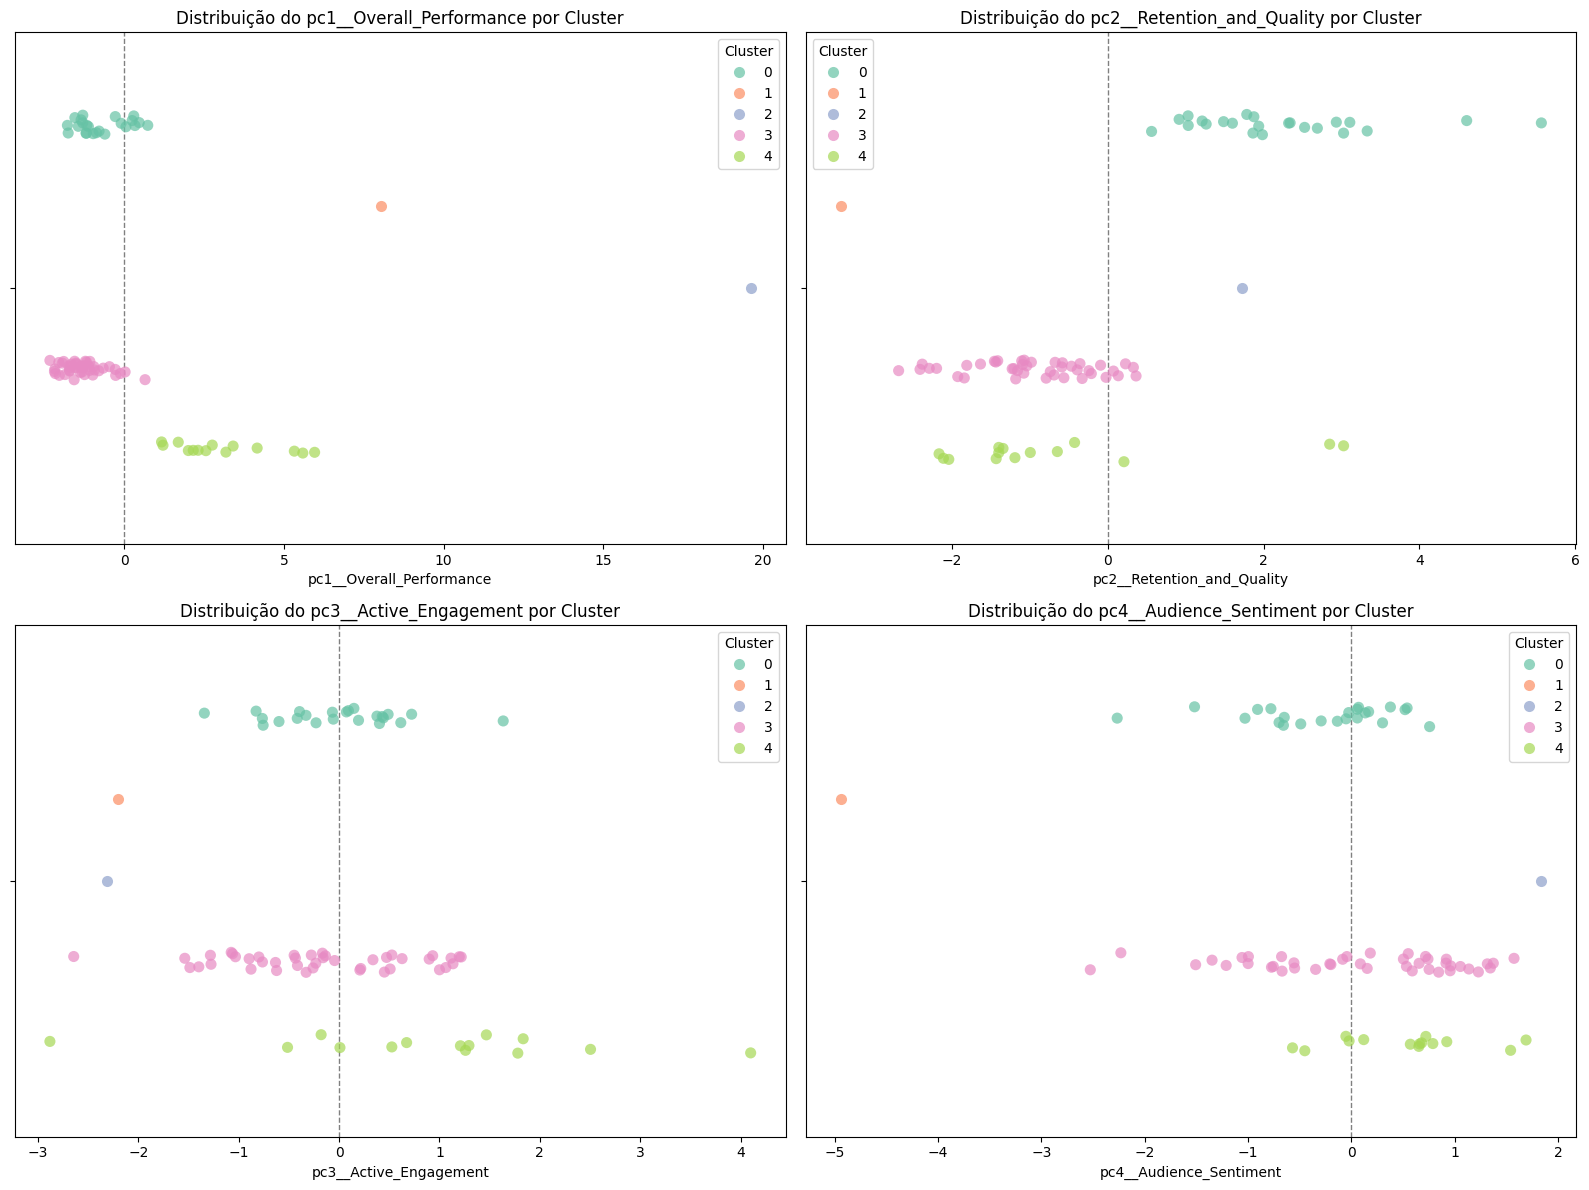

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista com os nomes dos PCs
pcs = [
    'pc1__Overall_Performance',
    'pc2__Retention_and_Quality',
    'pc3__Active_Engagement',
    'pc4__Audience_Sentiment'
]

# Cria subplots: 2 linhas x 2 colunas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Plota cada PC isolado
for ax, pc in zip(axes, pcs):
    sns.stripplot(
        data=pcs_df,
        x=pc,
        y=['']*len(pcs_df),  # 'dummy' para n√£o ter eixo Y
        hue='cluster',
        palette='Set2',
        dodge=True,
        ax=ax,
        size=8,
        alpha=0.7
    )
    ax.set_title(f'Distribui√ß√£o do {pc} por Cluster')
    ax.axvline(0, ls='--', lw=1, c='gray')  # linha no zero
    ax.set_ylabel('')
    ax.legend(title='Cluster')

# Ajusta layout
plt.tight_layout()
plt.show()


Interpreta√ß√£o: Neste gr√°fico fica mais clara a necessidade de remover o v√≠deo da Praia de Nudismo da base, considerando que ele poderia ser mal interpretado pelo modelo. Apesar dele ter views e receita da √©poca que ficou ativo, ele atualmente n√£o est√° mais sendo exibido no canal, apenas para membros, sem falar que todas as demais m√©tricas dele s√£o ruins. √â um v√≠deo que foge do padr√£o de v√≠deos do canal.
<br> <br>

J√° o v√≠deo da Gastronomia Curitibana √© um v√≠deo que deu certo e que tem se destacado no canal, acertamos em v√°rios aspectos, por isso acredito n√£o ser uma boa remove-lo do canal. Ele tem v√°rios itens relevantes. Foi o primeiro v√≠deo de gastronomia do canal, foi o primeiro v√≠deo com hist√≥ria do canal, foi o primeiro v√≠deo depois de um longo tempo estudando outras formas de editar, foi um dos primeiros com qualidade melhor, ent√£o √© um v√≠deo que pode contrbuir para as an√°lises e modelagem, diferente do de nudismo que atraiu espectadores que s√≥ tinham interesse neste v√≠deo, acabou viesando o perfil do p√∫blico. Desde que o removemos do canal, o canal melhorou muito suas m√©tricas e estat√≠sticas em geral.